In [1]:
%reset -f
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from tensorflow.keras import layers

# modèle Discriminateur

In [2]:
def f_discriminateur(y1,y2):
    s = np.zeros(np.size(y1))
    for i in range(np.size(y1)):
        if (y1[i] == y2[i]**2):
            s[i] = 1
        else:
            s[i] = 0
    return s

In [3]:
seed = 7
np.random.seed(seed)

N = 1000

y_train1 = np.linspace(-0.5,0.5,N)
y_train2 = np.random.rand(N)
y_train2 -= 0.5
y_train2 = np.sort(y_train2)
s_train = f_discriminateur(y_train1,y_train2)

In [4]:
y_train= np.zeros((N,2))

In [5]:
for i in range(N):
    y_train[i] = [y_train1[i],y_train2[i]]

In [6]:
y_train.shape

(1000, 2)

In [7]:
s_train.shape

(1000,)

In [8]:
# Define Sequential model with 3 layers
model_discr = keras.Sequential(
    [
        layers.Dense(32, input_dim = 2, activation="relu"),
#         layers.Dense(64, activation="relu"),
#         layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)


In [9]:
#compile the model and compute the parameters of the model
model_discr.compile(optimizer='adam',loss='binary_crossentropy')
model_discr.trainable = False

In [10]:
# model_discr.fit(y_train,s_train,epochs=300,batch_size=32)

# modèle Générateur G

In [11]:
X_train = np.linspace(-0.5,0.5,N)
y_train = X_train**2
x_val = np.random.rand(N)
x_val -= 0.5
x_val = np.sort(x_val)
y_val = x_val**2

In [12]:
latent_dim = 5

In [13]:
# Define Sequential model with 3 layers
model_gen = keras.Sequential(
    [
        layers.Dense(32, input_dim = latent_dim,activation="relu"),
#         layers.Dense(64, activation="relu"),
#         layers.Dense(64, activation="relu"),
        layers.Dense(2)
    ]
)


In [14]:
#compile the model and compute the parameters of the model
# model_gen.compile(optimizer='adam',loss='binary_crossentropy')

# modèle GAN

In [15]:
model_gan = tf.keras.models.Sequential([model_gen, model_discr])
model_gan.compile(optimizer='adam',loss='binary_crossentropy')

# fonction génération vraies valeurs

In [16]:
def generate_reel_samples(n):
    X_train = np.random.rand(n)
    X_train -= 0.5
    X_train = np.sort(X_train)
    y_train = X_train**2
    X = np.zeros((n,2))
    for i in range(n):
        X[i][0] = X_train[i]
        X[i][1] = y_train[i]
    s = np.ones(n)
    res = (X,s)
    return res

In [17]:
y_test6252 = generate_reel_samples(32)

In [18]:
y_test142= y_test6252[0]

In [19]:
y_test142

array([[-4.55328137e-01,  2.07323712e-01],
       [-4.50135716e-01,  2.02622163e-01],
       [-4.41048321e-01,  1.94523622e-01],
       [-4.35476269e-01,  1.89639581e-01],
       [-3.67223111e-01,  1.34852813e-01],
       [-3.65380533e-01,  1.33502934e-01],
       [-3.30277513e-01,  1.09083235e-01],
       [-2.17511203e-01,  4.73111234e-02],
       [-1.98605548e-01,  3.94441635e-02],
       [-1.47690915e-01,  2.18126063e-02],
       [-1.09632978e-01,  1.20193899e-02],
       [-6.63452534e-02,  4.40169264e-03],
       [-3.96295117e-02,  1.57049820e-03],
       [ 1.03713073e-03,  1.07564016e-06],
       [ 1.47695917e-02,  2.18140840e-04],
       [ 5.34621438e-02,  2.85820082e-03],
       [ 9.89522818e-02,  9.79155408e-03],
       [ 1.06561405e-01,  1.13553330e-02],
       [ 1.62139509e-01,  2.62892205e-02],
       [ 1.74498156e-01,  3.04496064e-02],
       [ 2.03086905e-01,  4.12442909e-02],
       [ 2.31220448e-01,  5.34628954e-02],
       [ 2.43709912e-01,  5.93945214e-02],
       [ 2.

# fonction génération de fausses valeurs

In [20]:
def generate_fake_samples(generator,latent_dim,n):
    X_train = np.random.rand(n,latent_dim)
#     X_train -= 0.5
    X_train = np.sort(X_train)
#     X = np.zeros((n,latent_dim))
    X = generator.predict(X_train)
    s = np.zeros(n)
    return (X,s)

In [21]:
y_test54 = generate_fake_samples(model_gen,5,32)

In [22]:
y_test132 = y_test54[0]

In [23]:
model_discr.trainable = False

# test 

Text(0.5, 1.0, 'fake sample')

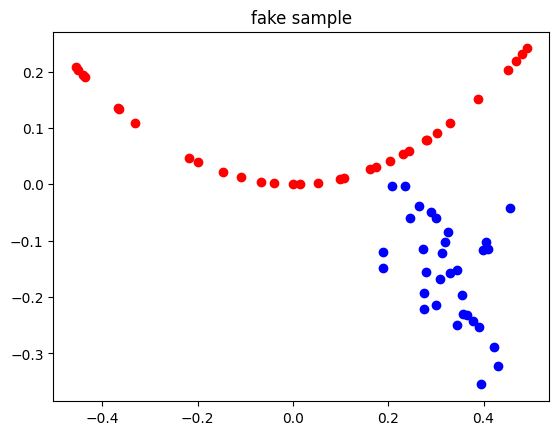

In [24]:
# vraies valeurs:
# plt.subplot(1,2)
plt.scatter(y_test142[:,0],y_test142[:,1],c='r')
plt.title('true sample')

# fake valeurs:
# plt.subplot(2,2)
plt.scatter(y_test132[:,0],y_test132[:,1],c='b')
plt.title('fake sample')


# mise en relation

coucou 0


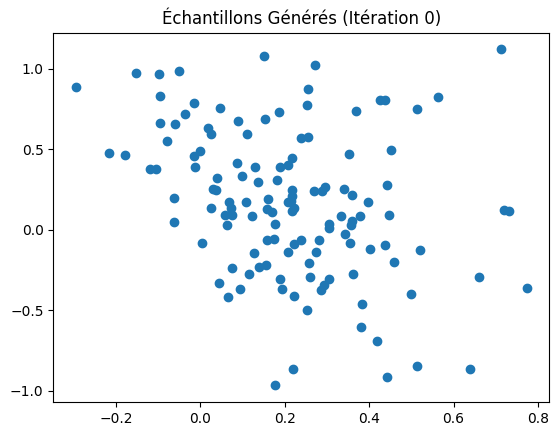

coucou 1
coucou 2
coucou 3
coucou 4
coucou 5
coucou 6
coucou 7
coucou 8
coucou 9
coucou 10
coucou 11
coucou 12
coucou 13
coucou 14
coucou 15
coucou 16
coucou 17
coucou 18
coucou 19
coucou 20
coucou 21
coucou 22
coucou 23
coucou 24
coucou 25
coucou 26
coucou 27
coucou 28
coucou 29
coucou 30
coucou 31
coucou 32
coucou 33
coucou 34
coucou 35
coucou 36
coucou 37
coucou 38
coucou 39
coucou 40
coucou 41
coucou 42
coucou 43
coucou 44
coucou 45
coucou 46
coucou 47
coucou 48
coucou 49
coucou 50
coucou 51
coucou 52
coucou 53
coucou 54
coucou 55
coucou 56
coucou 57
coucou 58
coucou 59
coucou 60
coucou 61
coucou 62
coucou 63
coucou 64
coucou 65
coucou 66
coucou 67
coucou 68
coucou 69
coucou 70
coucou 71
coucou 72
coucou 73
coucou 74
coucou 75
coucou 76
coucou 77
coucou 78
coucou 79
coucou 80
coucou 81
coucou 82
coucou 83
coucou 84
coucou 85
coucou 86
coucou 87
coucou 88
coucou 89
coucou 90
coucou 91
coucou 92
coucou 93
coucou 94
coucou 95
coucou 96
coucou 97
coucou 98
coucou 99
coucou 100
coucou 1

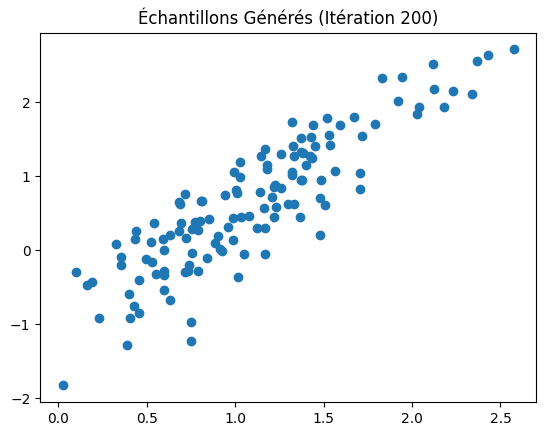

coucou 201
coucou 202
coucou 203
coucou 204
coucou 205
coucou 206
coucou 207
coucou 208
coucou 209
coucou 210
coucou 211
coucou 212
coucou 213
coucou 214
coucou 215
coucou 216
coucou 217
coucou 218
coucou 219
coucou 220
coucou 221
coucou 222
coucou 223
coucou 224
coucou 225
coucou 226
coucou 227
coucou 228
coucou 229
coucou 230
coucou 231
coucou 232
coucou 233
coucou 234
coucou 235
coucou 236
coucou 237
coucou 238
coucou 239
coucou 240
coucou 241
coucou 242
coucou 243
coucou 244
coucou 245
coucou 246
coucou 247
coucou 248
coucou 249
coucou 250
coucou 251
coucou 252
coucou 253
coucou 254
coucou 255
coucou 256
coucou 257
coucou 258
coucou 259
coucou 260
coucou 261
coucou 262
coucou 263
coucou 264
coucou 265
coucou 266
coucou 267
coucou 268
coucou 269
coucou 270
coucou 271
coucou 272
coucou 273
coucou 274
coucou 275
coucou 276
coucou 277
coucou 278
coucou 279
coucou 280
coucou 281
coucou 282
coucou 283
coucou 284
coucou 285
coucou 286
coucou 287
coucou 288
coucou 289
coucou 290
coucou 291

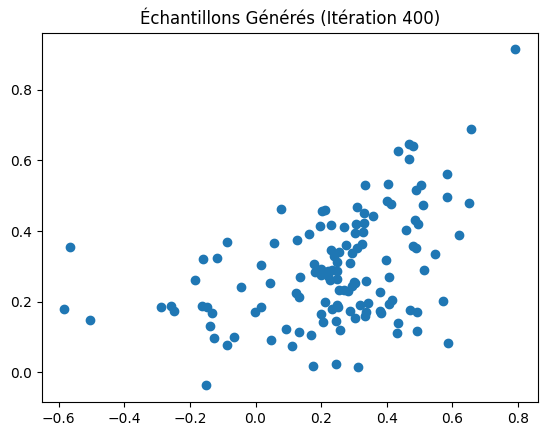

coucou 401
coucou 402
coucou 403
coucou 404
coucou 405
coucou 406
coucou 407
coucou 408
coucou 409
coucou 410
coucou 411
coucou 412
coucou 413
coucou 414
coucou 415
coucou 416
coucou 417
coucou 418
coucou 419
coucou 420
coucou 421
coucou 422
coucou 423
coucou 424
coucou 425
coucou 426
coucou 427
coucou 428
coucou 429
coucou 430
coucou 431
coucou 432
coucou 433
coucou 434
coucou 435
coucou 436
coucou 437
coucou 438
coucou 439
coucou 440
coucou 441
coucou 442
coucou 443
coucou 444
coucou 445
coucou 446
coucou 447
coucou 448
coucou 449
coucou 450
coucou 451
coucou 452
coucou 453
coucou 454
coucou 455
coucou 456
coucou 457
coucou 458
coucou 459
coucou 460
coucou 461
coucou 462
coucou 463
coucou 464
coucou 465
coucou 466
coucou 467
coucou 468
coucou 469
coucou 470
coucou 471
coucou 472
coucou 473
coucou 474
coucou 475
coucou 476
coucou 477
coucou 478
coucou 479
coucou 480
coucou 481
coucou 482
coucou 483
coucou 484
coucou 485
coucou 486
coucou 487
coucou 488
coucou 489
coucou 490
coucou 491

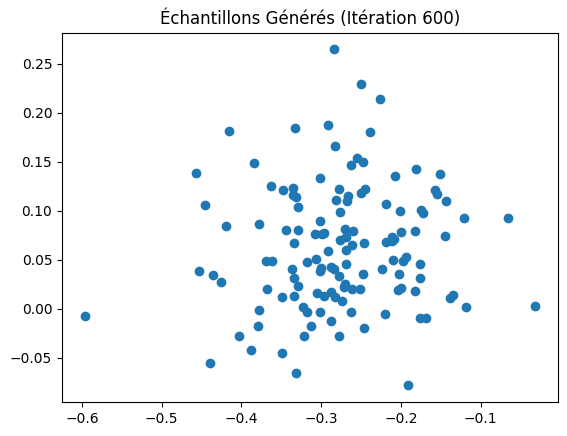

coucou 601
coucou 602
coucou 603
coucou 604
coucou 605
coucou 606
coucou 607
coucou 608
coucou 609
coucou 610
coucou 611
coucou 612
coucou 613
coucou 614
coucou 615
coucou 616
coucou 617
coucou 618
coucou 619
coucou 620
coucou 621
coucou 622
coucou 623
coucou 624
coucou 625
coucou 626
coucou 627
coucou 628
coucou 629
coucou 630
coucou 631
coucou 632
coucou 633
coucou 634
coucou 635
coucou 636
coucou 637
coucou 638
coucou 639
coucou 640
coucou 641
coucou 642
coucou 643
coucou 644
coucou 645
coucou 646
coucou 647
coucou 648
coucou 649
coucou 650
coucou 651
coucou 652
coucou 653
coucou 654
coucou 655
coucou 656
coucou 657
coucou 658
coucou 659
coucou 660
coucou 661
coucou 662
coucou 663
coucou 664
coucou 665
coucou 666
coucou 667
coucou 668
coucou 669
coucou 670
coucou 671
coucou 672
coucou 673
coucou 674
coucou 675
coucou 676
coucou 677
coucou 678
coucou 679
coucou 680
coucou 681
coucou 682
coucou 683
coucou 684
coucou 685
coucou 686
coucou 687
coucou 688
coucou 689
coucou 690
coucou 691

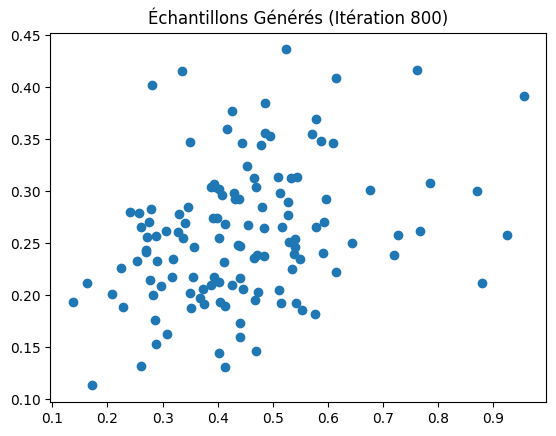

coucou 801
coucou 802
coucou 803
coucou 804
coucou 805
coucou 806
coucou 807
coucou 808
coucou 809
coucou 810
coucou 811
coucou 812
coucou 813
coucou 814
coucou 815
coucou 816
coucou 817
coucou 818
coucou 819
coucou 820
coucou 821
coucou 822
coucou 823
coucou 824
coucou 825
coucou 826
coucou 827
coucou 828
coucou 829
coucou 830
coucou 831
coucou 832
coucou 833
coucou 834
coucou 835
coucou 836
coucou 837
coucou 838
coucou 839
coucou 840
coucou 841
coucou 842
coucou 843
coucou 844
coucou 845
coucou 846
coucou 847
coucou 848
coucou 849
coucou 850
coucou 851
coucou 852
coucou 853
coucou 854
coucou 855
coucou 856
coucou 857
coucou 858
coucou 859
coucou 860
coucou 861
coucou 862
coucou 863
coucou 864
coucou 865
coucou 866
coucou 867
coucou 868
coucou 869
coucou 870
coucou 871
coucou 872
coucou 873
coucou 874
coucou 875
coucou 876
coucou 877
coucou 878
coucou 879
coucou 880
coucou 881
coucou 882
coucou 883
coucou 884
coucou 885
coucou 886
coucou 887
coucou 888
coucou 889
coucou 890
coucou 891

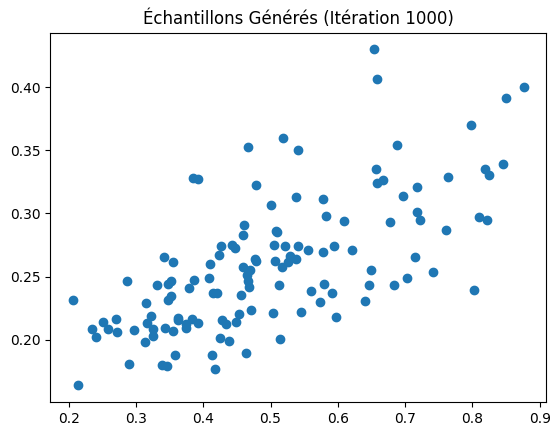

coucou 1001
coucou 1002
coucou 1003
coucou 1004
coucou 1005
coucou 1006
coucou 1007
coucou 1008
coucou 1009
coucou 1010
coucou 1011
coucou 1012
coucou 1013
coucou 1014
coucou 1015
coucou 1016
coucou 1017
coucou 1018
coucou 1019
coucou 1020
coucou 1021
coucou 1022
coucou 1023
coucou 1024
coucou 1025
coucou 1026
coucou 1027
coucou 1028
coucou 1029
coucou 1030
coucou 1031
coucou 1032
coucou 1033
coucou 1034
coucou 1035
coucou 1036
coucou 1037
coucou 1038
coucou 1039
coucou 1040
coucou 1041
coucou 1042
coucou 1043
coucou 1044
coucou 1045
coucou 1046
coucou 1047
coucou 1048
coucou 1049
coucou 1050
coucou 1051
coucou 1052
coucou 1053
coucou 1054
coucou 1055
coucou 1056
coucou 1057
coucou 1058
coucou 1059
coucou 1060
coucou 1061
coucou 1062
coucou 1063
coucou 1064
coucou 1065
coucou 1066
coucou 1067
coucou 1068
coucou 1069
coucou 1070
coucou 1071
coucou 1072
coucou 1073
coucou 1074
coucou 1075
coucou 1076
coucou 1077
coucou 1078
coucou 1079
coucou 1080
coucou 1081
coucou 1082
coucou 1083
couc

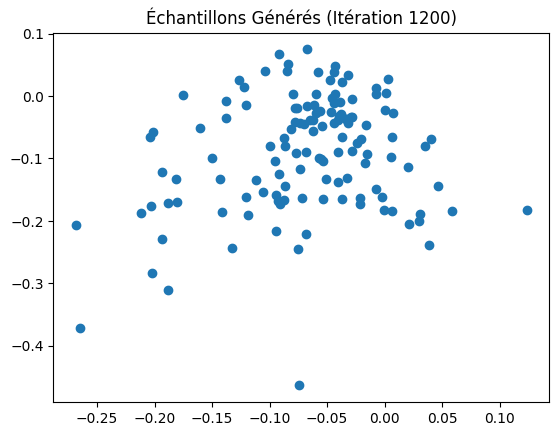

coucou 1201
coucou 1202
coucou 1203
coucou 1204
coucou 1205
coucou 1206
coucou 1207
coucou 1208
coucou 1209
coucou 1210
coucou 1211
coucou 1212
coucou 1213
coucou 1214
coucou 1215
coucou 1216
coucou 1217
coucou 1218
coucou 1219
coucou 1220
coucou 1221
coucou 1222
coucou 1223
coucou 1224
coucou 1225
coucou 1226
coucou 1227
coucou 1228
coucou 1229
coucou 1230
coucou 1231
coucou 1232
coucou 1233
coucou 1234
coucou 1235
coucou 1236
coucou 1237
coucou 1238
coucou 1239
coucou 1240
coucou 1241
coucou 1242
coucou 1243
coucou 1244
coucou 1245
coucou 1246
coucou 1247
coucou 1248
coucou 1249
coucou 1250
coucou 1251
coucou 1252
coucou 1253
coucou 1254
coucou 1255
coucou 1256
coucou 1257
coucou 1258
coucou 1259
coucou 1260
coucou 1261
coucou 1262
coucou 1263
coucou 1264
coucou 1265
coucou 1266
coucou 1267
coucou 1268
coucou 1269
coucou 1270
coucou 1271
coucou 1272
coucou 1273
coucou 1274
coucou 1275
coucou 1276
coucou 1277
coucou 1278
coucou 1279
coucou 1280
coucou 1281
coucou 1282
coucou 1283
couc

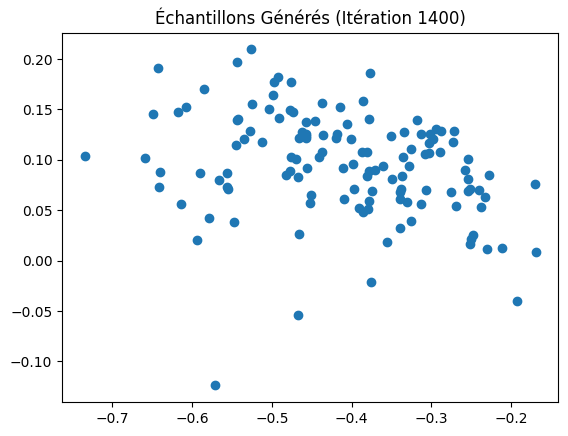

coucou 1401
coucou 1402
coucou 1403
coucou 1404
coucou 1405
coucou 1406
coucou 1407
coucou 1408
coucou 1409
coucou 1410
coucou 1411
coucou 1412
coucou 1413
coucou 1414
coucou 1415
coucou 1416
coucou 1417
coucou 1418
coucou 1419
coucou 1420
coucou 1421
coucou 1422
coucou 1423
coucou 1424
coucou 1425
coucou 1426
coucou 1427
coucou 1428
coucou 1429
coucou 1430
coucou 1431
coucou 1432
coucou 1433
coucou 1434
coucou 1435
coucou 1436
coucou 1437
coucou 1438
coucou 1439
coucou 1440
coucou 1441
coucou 1442
coucou 1443
coucou 1444
coucou 1445
coucou 1446
coucou 1447
coucou 1448
coucou 1449
coucou 1450
coucou 1451
coucou 1452
coucou 1453
coucou 1454
coucou 1455
coucou 1456
coucou 1457
coucou 1458
coucou 1459
coucou 1460
coucou 1461
coucou 1462
coucou 1463
coucou 1464
coucou 1465
coucou 1466
coucou 1467
coucou 1468
coucou 1469
coucou 1470
coucou 1471
coucou 1472
coucou 1473
coucou 1474
coucou 1475
coucou 1476
coucou 1477
coucou 1478
coucou 1479
coucou 1480
coucou 1481
coucou 1482
coucou 1483
couc

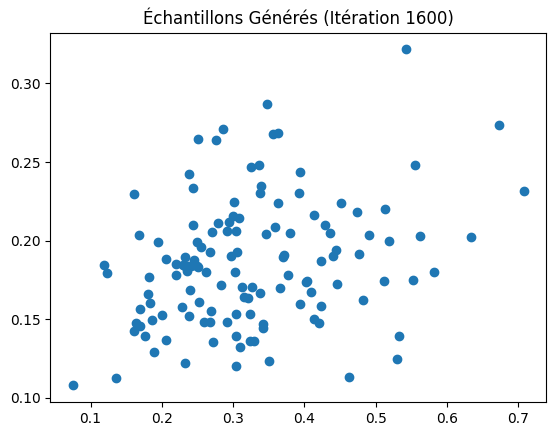

coucou 1601
coucou 1602
coucou 1603
coucou 1604
coucou 1605
coucou 1606
coucou 1607
coucou 1608
coucou 1609
coucou 1610
coucou 1611
coucou 1612
coucou 1613
coucou 1614
coucou 1615
coucou 1616
coucou 1617
coucou 1618
coucou 1619
coucou 1620
coucou 1621
coucou 1622
coucou 1623
coucou 1624
coucou 1625
coucou 1626
coucou 1627
coucou 1628
coucou 1629
coucou 1630
coucou 1631
coucou 1632
coucou 1633
coucou 1634
coucou 1635
coucou 1636
coucou 1637
coucou 1638
coucou 1639
coucou 1640
coucou 1641
coucou 1642
coucou 1643
coucou 1644
coucou 1645
coucou 1646
coucou 1647
coucou 1648
coucou 1649
coucou 1650
coucou 1651
coucou 1652
coucou 1653
coucou 1654
coucou 1655
coucou 1656
coucou 1657
coucou 1658
coucou 1659
coucou 1660
coucou 1661
coucou 1662
coucou 1663
coucou 1664
coucou 1665
coucou 1666
coucou 1667
coucou 1668
coucou 1669
coucou 1670
coucou 1671
coucou 1672
coucou 1673
coucou 1674
coucou 1675
coucou 1676
coucou 1677
coucou 1678
coucou 1679
coucou 1680
coucou 1681
coucou 1682
coucou 1683
couc

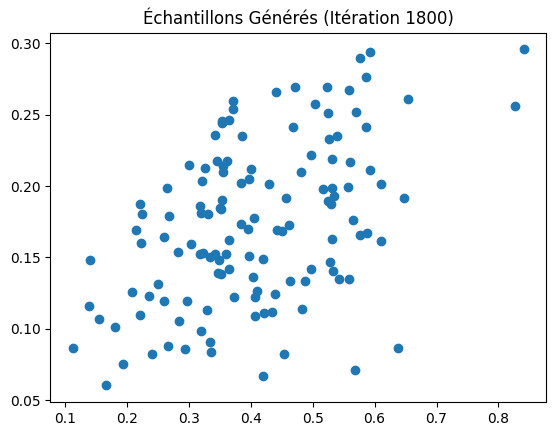

coucou 1801
coucou 1802
coucou 1803
coucou 1804
coucou 1805
coucou 1806
coucou 1807
coucou 1808
coucou 1809
coucou 1810
coucou 1811
coucou 1812
coucou 1813
coucou 1814
coucou 1815
coucou 1816
coucou 1817
coucou 1818
coucou 1819
coucou 1820
coucou 1821
coucou 1822
coucou 1823
coucou 1824
coucou 1825
coucou 1826
coucou 1827
coucou 1828
coucou 1829
coucou 1830
coucou 1831
coucou 1832
coucou 1833
coucou 1834
coucou 1835
coucou 1836
coucou 1837
coucou 1838
coucou 1839
coucou 1840
coucou 1841
coucou 1842
coucou 1843
coucou 1844
coucou 1845
coucou 1846
coucou 1847
coucou 1848
coucou 1849
coucou 1850
coucou 1851
coucou 1852
coucou 1853
coucou 1854
coucou 1855
coucou 1856
coucou 1857
coucou 1858
coucou 1859
coucou 1860
coucou 1861
coucou 1862
coucou 1863
coucou 1864
coucou 1865
coucou 1866
coucou 1867
coucou 1868
coucou 1869
coucou 1870
coucou 1871
coucou 1872
coucou 1873
coucou 1874
coucou 1875
coucou 1876
coucou 1877
coucou 1878
coucou 1879
coucou 1880
coucou 1881
coucou 1882
coucou 1883
couc

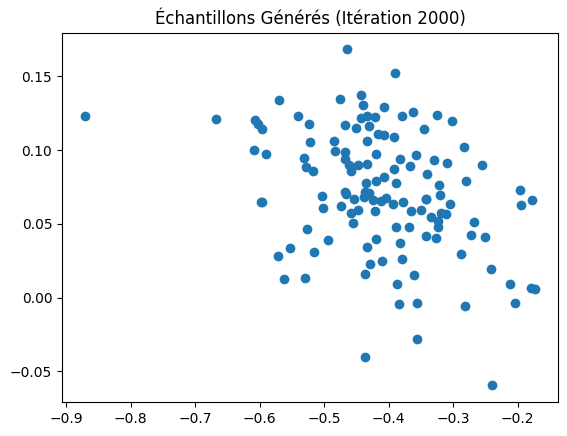

coucou 2001
coucou 2002
coucou 2003
coucou 2004
coucou 2005
coucou 2006
coucou 2007
coucou 2008
coucou 2009
coucou 2010
coucou 2011
coucou 2012
coucou 2013
coucou 2014
coucou 2015
coucou 2016
coucou 2017
coucou 2018
coucou 2019
coucou 2020
coucou 2021
coucou 2022
coucou 2023
coucou 2024
coucou 2025
coucou 2026
coucou 2027
coucou 2028
coucou 2029
coucou 2030
coucou 2031
coucou 2032
coucou 2033
coucou 2034
coucou 2035
coucou 2036
coucou 2037
coucou 2038
coucou 2039
coucou 2040
coucou 2041
coucou 2042
coucou 2043
coucou 2044
coucou 2045
coucou 2046
coucou 2047
coucou 2048
coucou 2049
coucou 2050
coucou 2051
coucou 2052
coucou 2053
coucou 2054
coucou 2055
coucou 2056
coucou 2057
coucou 2058
coucou 2059
coucou 2060
coucou 2061
coucou 2062
coucou 2063
coucou 2064
coucou 2065
coucou 2066
coucou 2067
coucou 2068
coucou 2069
coucou 2070
coucou 2071
coucou 2072
coucou 2073
coucou 2074
coucou 2075
coucou 2076
coucou 2077
coucou 2078
coucou 2079
coucou 2080
coucou 2081
coucou 2082
coucou 2083
couc

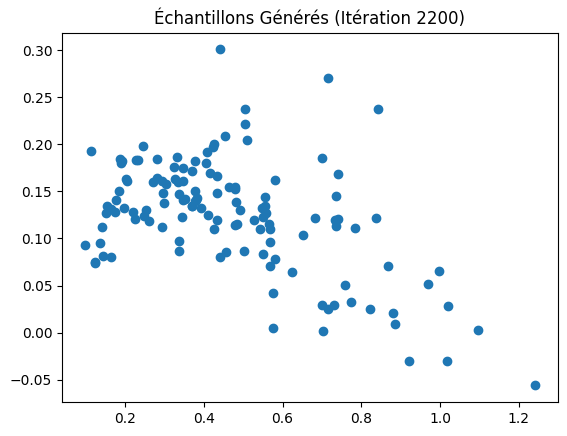

coucou 2201
coucou 2202
coucou 2203
coucou 2204
coucou 2205
coucou 2206
coucou 2207
coucou 2208
coucou 2209
coucou 2210
coucou 2211
coucou 2212
coucou 2213
coucou 2214
coucou 2215
coucou 2216
coucou 2217
coucou 2218
coucou 2219
coucou 2220
coucou 2221
coucou 2222
coucou 2223
coucou 2224
coucou 2225
coucou 2226
coucou 2227
coucou 2228
coucou 2229
coucou 2230
coucou 2231
coucou 2232
coucou 2233
coucou 2234
coucou 2235
coucou 2236
coucou 2237
coucou 2238
coucou 2239
coucou 2240
coucou 2241
coucou 2242
coucou 2243
coucou 2244
coucou 2245
coucou 2246
coucou 2247
coucou 2248
coucou 2249
coucou 2250
coucou 2251
coucou 2252
coucou 2253
coucou 2254
coucou 2255
coucou 2256
coucou 2257
coucou 2258
coucou 2259
coucou 2260
coucou 2261
coucou 2262
coucou 2263
coucou 2264
coucou 2265
coucou 2266
coucou 2267
coucou 2268
coucou 2269
coucou 2270
coucou 2271
coucou 2272
coucou 2273
coucou 2274
coucou 2275
coucou 2276
coucou 2277
coucou 2278
coucou 2279
coucou 2280
coucou 2281
coucou 2282
coucou 2283
couc

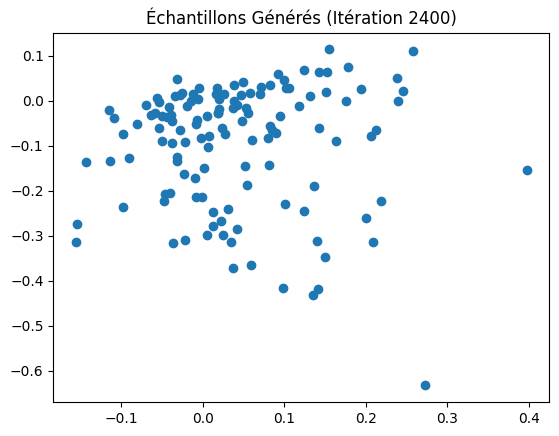

coucou 2401
coucou 2402
coucou 2403
coucou 2404
coucou 2405
coucou 2406
coucou 2407
coucou 2408
coucou 2409
coucou 2410
coucou 2411
coucou 2412
coucou 2413
coucou 2414
coucou 2415
coucou 2416
coucou 2417
coucou 2418
coucou 2419
coucou 2420
coucou 2421
coucou 2422
coucou 2423
coucou 2424
coucou 2425
coucou 2426
coucou 2427
coucou 2428
coucou 2429
coucou 2430
coucou 2431
coucou 2432
coucou 2433
coucou 2434
coucou 2435
coucou 2436
coucou 2437
coucou 2438
coucou 2439
coucou 2440
coucou 2441
coucou 2442
coucou 2443
coucou 2444
coucou 2445
coucou 2446
coucou 2447
coucou 2448
coucou 2449
coucou 2450
coucou 2451
coucou 2452
coucou 2453
coucou 2454
coucou 2455
coucou 2456
coucou 2457
coucou 2458
coucou 2459
coucou 2460
coucou 2461
coucou 2462
coucou 2463
coucou 2464
coucou 2465
coucou 2466
coucou 2467
coucou 2468
coucou 2469
coucou 2470
coucou 2471
coucou 2472
coucou 2473
coucou 2474
coucou 2475
coucou 2476
coucou 2477
coucou 2478
coucou 2479
coucou 2480
coucou 2481
coucou 2482
coucou 2483
couc

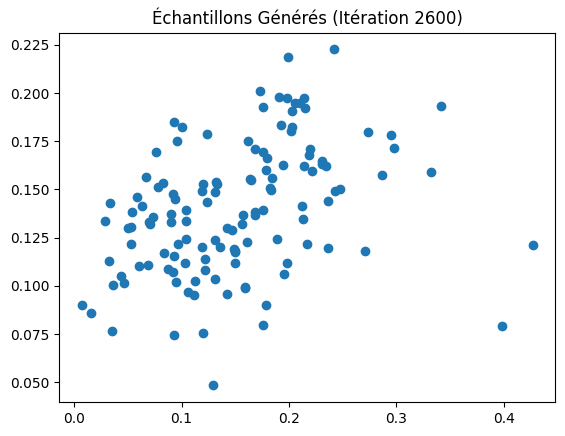

coucou 2601
coucou 2602
coucou 2603
coucou 2604
coucou 2605
coucou 2606
coucou 2607
coucou 2608
coucou 2609
coucou 2610
coucou 2611
coucou 2612
coucou 2613
coucou 2614
coucou 2615
coucou 2616
coucou 2617
coucou 2618
coucou 2619
coucou 2620
coucou 2621
coucou 2622
coucou 2623
coucou 2624
coucou 2625
coucou 2626
coucou 2627
coucou 2628
coucou 2629
coucou 2630
coucou 2631
coucou 2632
coucou 2633
coucou 2634
coucou 2635
coucou 2636
coucou 2637
coucou 2638
coucou 2639
coucou 2640
coucou 2641
coucou 2642
coucou 2643
coucou 2644
coucou 2645
coucou 2646
coucou 2647
coucou 2648
coucou 2649
coucou 2650
coucou 2651
coucou 2652
coucou 2653
coucou 2654
coucou 2655
coucou 2656
coucou 2657
coucou 2658
coucou 2659
coucou 2660
coucou 2661
coucou 2662
coucou 2663
coucou 2664
coucou 2665
coucou 2666
coucou 2667
coucou 2668
coucou 2669
coucou 2670
coucou 2671
coucou 2672
coucou 2673
coucou 2674
coucou 2675
coucou 2676
coucou 2677
coucou 2678
coucou 2679
coucou 2680
coucou 2681
coucou 2682
coucou 2683
couc

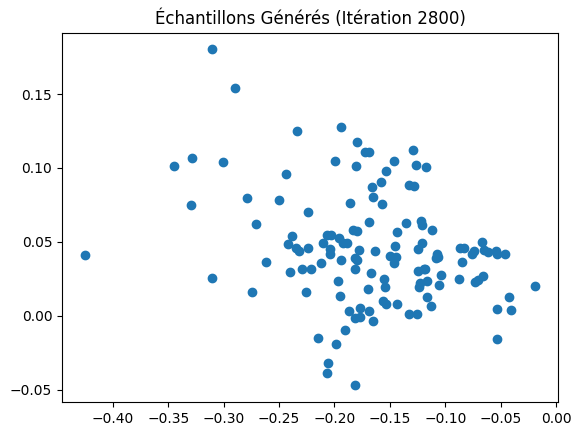

coucou 2801
coucou 2802
coucou 2803
coucou 2804
coucou 2805
coucou 2806
coucou 2807
coucou 2808
coucou 2809
coucou 2810
coucou 2811
coucou 2812
coucou 2813
coucou 2814
coucou 2815
coucou 2816
coucou 2817
coucou 2818
coucou 2819
coucou 2820
coucou 2821
coucou 2822
coucou 2823
coucou 2824
coucou 2825
coucou 2826
coucou 2827
coucou 2828
coucou 2829
coucou 2830
coucou 2831
coucou 2832
coucou 2833
coucou 2834
coucou 2835
coucou 2836
coucou 2837
coucou 2838
coucou 2839
coucou 2840
coucou 2841
coucou 2842
coucou 2843
coucou 2844
coucou 2845
coucou 2846
coucou 2847
coucou 2848
coucou 2849
coucou 2850
coucou 2851
coucou 2852
coucou 2853
coucou 2854
coucou 2855
coucou 2856
coucou 2857
coucou 2858
coucou 2859
coucou 2860
coucou 2861
coucou 2862
coucou 2863
coucou 2864
coucou 2865
coucou 2866
coucou 2867
coucou 2868
coucou 2869
coucou 2870
coucou 2871
coucou 2872
coucou 2873
coucou 2874
coucou 2875
coucou 2876
coucou 2877
coucou 2878
coucou 2879
coucou 2880
coucou 2881
coucou 2882
coucou 2883
couc

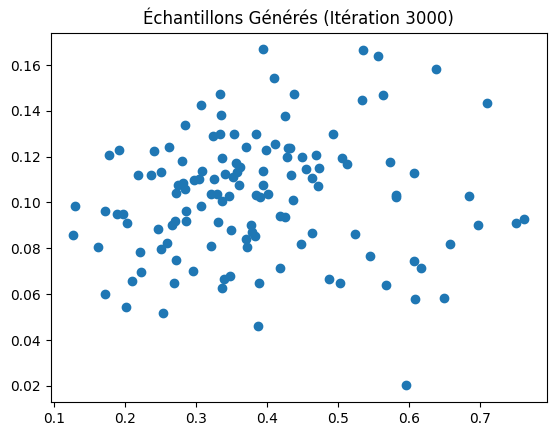

coucou 3001
coucou 3002
coucou 3003
coucou 3004
coucou 3005
coucou 3006
coucou 3007
coucou 3008
coucou 3009
coucou 3010
coucou 3011
coucou 3012
coucou 3013
coucou 3014
coucou 3015
coucou 3016
coucou 3017
coucou 3018
coucou 3019
coucou 3020
coucou 3021
coucou 3022
coucou 3023
coucou 3024
coucou 3025
coucou 3026
coucou 3027
coucou 3028
coucou 3029
coucou 3030
coucou 3031
coucou 3032
coucou 3033
coucou 3034
coucou 3035
coucou 3036
coucou 3037
coucou 3038
coucou 3039
coucou 3040
coucou 3041
coucou 3042
coucou 3043
coucou 3044
coucou 3045
coucou 3046
coucou 3047
coucou 3048
coucou 3049
coucou 3050
coucou 3051
coucou 3052
coucou 3053
coucou 3054
coucou 3055
coucou 3056
coucou 3057
coucou 3058
coucou 3059
coucou 3060
coucou 3061
coucou 3062
coucou 3063
coucou 3064
coucou 3065
coucou 3066
coucou 3067
coucou 3068
coucou 3069
coucou 3070
coucou 3071
coucou 3072
coucou 3073
coucou 3074
coucou 3075
coucou 3076
coucou 3077
coucou 3078
coucou 3079
coucou 3080
coucou 3081
coucou 3082
coucou 3083
couc

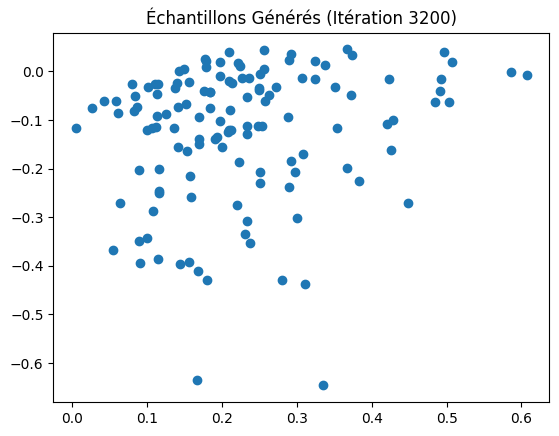

coucou 3201
coucou 3202
coucou 3203
coucou 3204
coucou 3205
coucou 3206
coucou 3207
coucou 3208
coucou 3209
coucou 3210
coucou 3211
coucou 3212
coucou 3213
coucou 3214
coucou 3215
coucou 3216
coucou 3217
coucou 3218
coucou 3219
coucou 3220
coucou 3221
coucou 3222
coucou 3223
coucou 3224
coucou 3225
coucou 3226
coucou 3227
coucou 3228
coucou 3229
coucou 3230
coucou 3231
coucou 3232
coucou 3233
coucou 3234
coucou 3235
coucou 3236
coucou 3237
coucou 3238
coucou 3239
coucou 3240
coucou 3241
coucou 3242
coucou 3243
coucou 3244
coucou 3245
coucou 3246
coucou 3247
coucou 3248
coucou 3249
coucou 3250
coucou 3251
coucou 3252
coucou 3253
coucou 3254
coucou 3255
coucou 3256
coucou 3257
coucou 3258
coucou 3259
coucou 3260
coucou 3261
coucou 3262
coucou 3263
coucou 3264
coucou 3265
coucou 3266
coucou 3267
coucou 3268
coucou 3269
coucou 3270
coucou 3271
coucou 3272
coucou 3273
coucou 3274
coucou 3275
coucou 3276
coucou 3277
coucou 3278
coucou 3279
coucou 3280
coucou 3281
coucou 3282
coucou 3283
couc

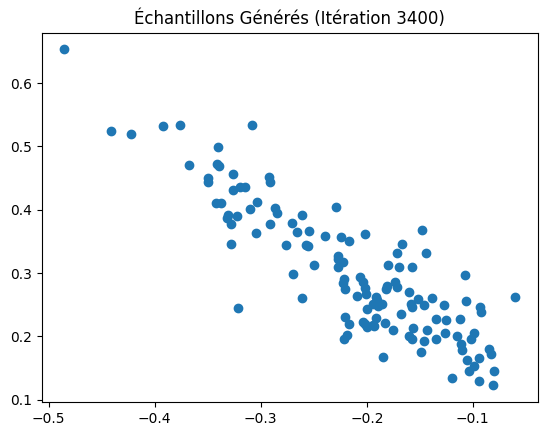

coucou 3401
coucou 3402
coucou 3403
coucou 3404
coucou 3405
coucou 3406
coucou 3407
coucou 3408
coucou 3409
coucou 3410
coucou 3411
coucou 3412
coucou 3413
coucou 3414
coucou 3415
coucou 3416
coucou 3417
coucou 3418
coucou 3419
coucou 3420
coucou 3421
coucou 3422
coucou 3423
coucou 3424
coucou 3425
coucou 3426
coucou 3427
coucou 3428
coucou 3429
coucou 3430
coucou 3431
coucou 3432
coucou 3433
coucou 3434
coucou 3435
coucou 3436
coucou 3437
coucou 3438
coucou 3439
coucou 3440
coucou 3441
coucou 3442
coucou 3443
coucou 3444
coucou 3445
coucou 3446
coucou 3447
coucou 3448
coucou 3449
coucou 3450
coucou 3451
coucou 3452
coucou 3453
coucou 3454
coucou 3455
coucou 3456
coucou 3457
coucou 3458
coucou 3459
coucou 3460
coucou 3461
coucou 3462
coucou 3463
coucou 3464
coucou 3465
coucou 3466
coucou 3467
coucou 3468
coucou 3469
coucou 3470
coucou 3471
coucou 3472
coucou 3473
coucou 3474
coucou 3475
coucou 3476
coucou 3477
coucou 3478
coucou 3479
coucou 3480
coucou 3481
coucou 3482
coucou 3483
couc

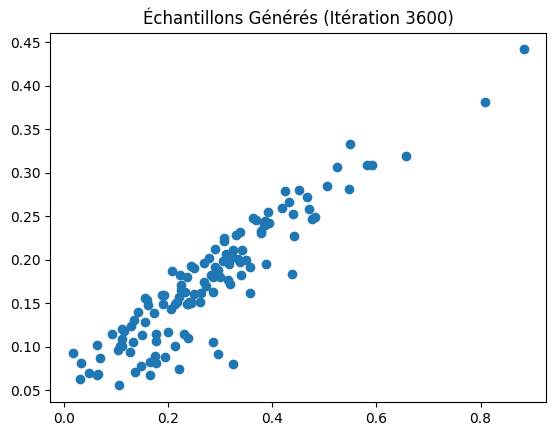

coucou 3601
coucou 3602
coucou 3603
coucou 3604
coucou 3605
coucou 3606
coucou 3607
coucou 3608
coucou 3609
coucou 3610
coucou 3611
coucou 3612
coucou 3613
coucou 3614
coucou 3615
coucou 3616
coucou 3617
coucou 3618
coucou 3619
coucou 3620
coucou 3621
coucou 3622
coucou 3623
coucou 3624
coucou 3625
coucou 3626
coucou 3627
coucou 3628
coucou 3629
coucou 3630
coucou 3631
coucou 3632
coucou 3633
coucou 3634
coucou 3635
coucou 3636
coucou 3637
coucou 3638
coucou 3639
coucou 3640
coucou 3641
coucou 3642
coucou 3643
coucou 3644
coucou 3645
coucou 3646
coucou 3647
coucou 3648
coucou 3649
coucou 3650
coucou 3651
coucou 3652
coucou 3653
coucou 3654
coucou 3655
coucou 3656
coucou 3657
coucou 3658
coucou 3659
coucou 3660
coucou 3661
coucou 3662
coucou 3663
coucou 3664
coucou 3665
coucou 3666
coucou 3667
coucou 3668
coucou 3669
coucou 3670
coucou 3671
coucou 3672
coucou 3673
coucou 3674
coucou 3675
coucou 3676
coucou 3677
coucou 3678
coucou 3679
coucou 3680
coucou 3681
coucou 3682
coucou 3683
couc

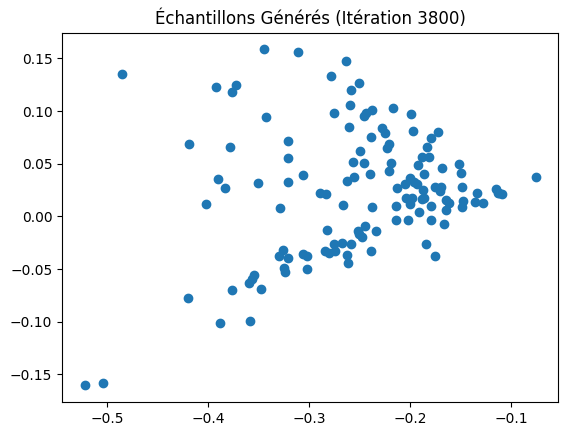

coucou 3801
coucou 3802
coucou 3803
coucou 3804
coucou 3805
coucou 3806
coucou 3807
coucou 3808
coucou 3809
coucou 3810
coucou 3811
coucou 3812
coucou 3813
coucou 3814
coucou 3815
coucou 3816
coucou 3817
coucou 3818
coucou 3819
coucou 3820
coucou 3821
coucou 3822
coucou 3823
coucou 3824
coucou 3825
coucou 3826
coucou 3827
coucou 3828
coucou 3829
coucou 3830
coucou 3831
coucou 3832
coucou 3833
coucou 3834
coucou 3835
coucou 3836
coucou 3837
coucou 3838
coucou 3839
coucou 3840
coucou 3841
coucou 3842
coucou 3843
coucou 3844
coucou 3845
coucou 3846
coucou 3847
coucou 3848
coucou 3849
coucou 3850
coucou 3851
coucou 3852
coucou 3853
coucou 3854
coucou 3855
coucou 3856
coucou 3857
coucou 3858
coucou 3859
coucou 3860
coucou 3861
coucou 3862
coucou 3863
coucou 3864
coucou 3865
coucou 3866
coucou 3867
coucou 3868
coucou 3869
coucou 3870
coucou 3871
coucou 3872
coucou 3873
coucou 3874
coucou 3875
coucou 3876
coucou 3877
coucou 3878
coucou 3879
coucou 3880
coucou 3881
coucou 3882
coucou 3883
couc

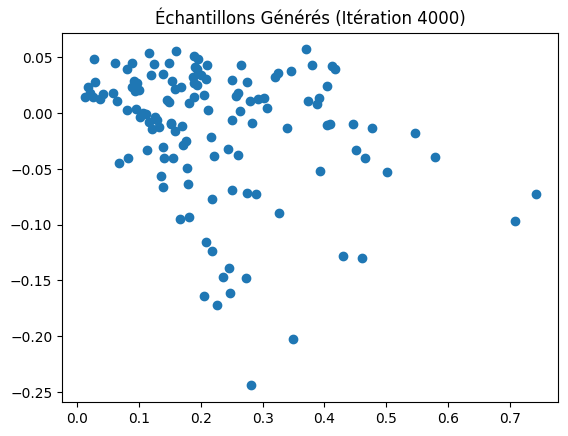

coucou 4001
coucou 4002
coucou 4003
coucou 4004
coucou 4005
coucou 4006
coucou 4007
coucou 4008
coucou 4009
coucou 4010
coucou 4011
coucou 4012
coucou 4013
coucou 4014
coucou 4015
coucou 4016
coucou 4017
coucou 4018
coucou 4019
coucou 4020
coucou 4021
coucou 4022
coucou 4023
coucou 4024
coucou 4025
coucou 4026
coucou 4027
coucou 4028
coucou 4029
coucou 4030
coucou 4031
coucou 4032
coucou 4033
coucou 4034
coucou 4035
coucou 4036
coucou 4037
coucou 4038
coucou 4039
coucou 4040
coucou 4041
coucou 4042
coucou 4043
coucou 4044
coucou 4045
coucou 4046
coucou 4047
coucou 4048
coucou 4049
coucou 4050
coucou 4051
coucou 4052
coucou 4053
coucou 4054
coucou 4055
coucou 4056
coucou 4057
coucou 4058
coucou 4059
coucou 4060
coucou 4061
coucou 4062
coucou 4063
coucou 4064
coucou 4065
coucou 4066
coucou 4067
coucou 4068
coucou 4069
coucou 4070
coucou 4071
coucou 4072
coucou 4073
coucou 4074
coucou 4075
coucou 4076
coucou 4077
coucou 4078
coucou 4079
coucou 4080
coucou 4081
coucou 4082
coucou 4083
couc

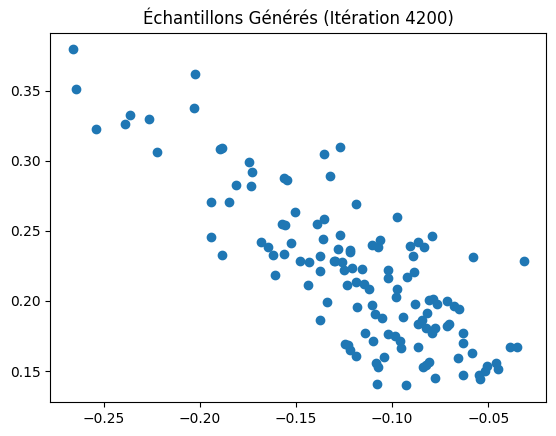

coucou 4201
coucou 4202
coucou 4203
coucou 4204
coucou 4205
coucou 4206
coucou 4207
coucou 4208
coucou 4209
coucou 4210
coucou 4211
coucou 4212
coucou 4213
coucou 4214
coucou 4215
coucou 4216
coucou 4217
coucou 4218
coucou 4219
coucou 4220
coucou 4221
coucou 4222
coucou 4223
coucou 4224
coucou 4225
coucou 4226
coucou 4227
coucou 4228
coucou 4229
coucou 4230
coucou 4231
coucou 4232
coucou 4233
coucou 4234
coucou 4235
coucou 4236
coucou 4237
coucou 4238
coucou 4239
coucou 4240
coucou 4241
coucou 4242
coucou 4243
coucou 4244
coucou 4245
coucou 4246
coucou 4247
coucou 4248
coucou 4249
coucou 4250
coucou 4251
coucou 4252
coucou 4253
coucou 4254
coucou 4255
coucou 4256
coucou 4257
coucou 4258
coucou 4259
coucou 4260
coucou 4261
coucou 4262
coucou 4263
coucou 4264
coucou 4265
coucou 4266
coucou 4267
coucou 4268
coucou 4269
coucou 4270
coucou 4271
coucou 4272
coucou 4273
coucou 4274
coucou 4275
coucou 4276
coucou 4277
coucou 4278
coucou 4279
coucou 4280
coucou 4281
coucou 4282
coucou 4283
couc

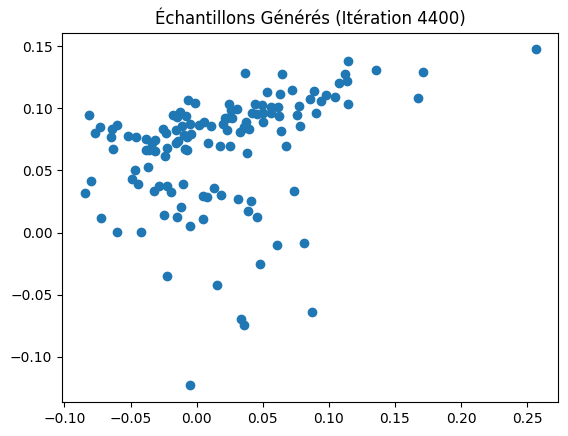

coucou 4401
coucou 4402
coucou 4403
coucou 4404
coucou 4405
coucou 4406
coucou 4407
coucou 4408
coucou 4409
coucou 4410
coucou 4411
coucou 4412
coucou 4413
coucou 4414
coucou 4415
coucou 4416
coucou 4417
coucou 4418
coucou 4419
coucou 4420
coucou 4421
coucou 4422
coucou 4423
coucou 4424
coucou 4425
coucou 4426
coucou 4427
coucou 4428
coucou 4429
coucou 4430
coucou 4431
coucou 4432
coucou 4433
coucou 4434
coucou 4435
coucou 4436
coucou 4437
coucou 4438
coucou 4439
coucou 4440
coucou 4441
coucou 4442
coucou 4443
coucou 4444
coucou 4445
coucou 4446
coucou 4447
coucou 4448
coucou 4449
coucou 4450
coucou 4451
coucou 4452
coucou 4453
coucou 4454
coucou 4455
coucou 4456
coucou 4457
coucou 4458
coucou 4459
coucou 4460
coucou 4461
coucou 4462
coucou 4463
coucou 4464
coucou 4465
coucou 4466
coucou 4467
coucou 4468
coucou 4469
coucou 4470
coucou 4471
coucou 4472
coucou 4473
coucou 4474
coucou 4475
coucou 4476
coucou 4477
coucou 4478
coucou 4479
coucou 4480
coucou 4481
coucou 4482
coucou 4483
couc

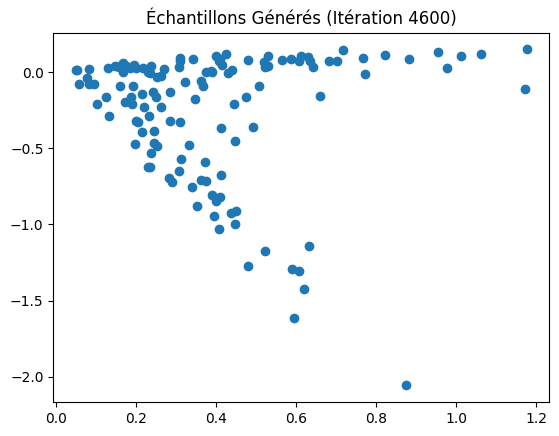

coucou 4601
coucou 4602
coucou 4603
coucou 4604
coucou 4605
coucou 4606
coucou 4607
coucou 4608
coucou 4609
coucou 4610
coucou 4611
coucou 4612
coucou 4613
coucou 4614
coucou 4615
coucou 4616
coucou 4617
coucou 4618
coucou 4619
coucou 4620
coucou 4621
coucou 4622
coucou 4623
coucou 4624
coucou 4625
coucou 4626
coucou 4627
coucou 4628
coucou 4629
coucou 4630
coucou 4631
coucou 4632
coucou 4633
coucou 4634
coucou 4635
coucou 4636
coucou 4637
coucou 4638
coucou 4639
coucou 4640
coucou 4641
coucou 4642
coucou 4643
coucou 4644
coucou 4645
coucou 4646
coucou 4647
coucou 4648
coucou 4649
coucou 4650
coucou 4651
coucou 4652
coucou 4653
coucou 4654
coucou 4655
coucou 4656
coucou 4657
coucou 4658
coucou 4659
coucou 4660
coucou 4661
coucou 4662
coucou 4663
coucou 4664
coucou 4665
coucou 4666
coucou 4667
coucou 4668
coucou 4669
coucou 4670
coucou 4671
coucou 4672
coucou 4673
coucou 4674
coucou 4675
coucou 4676
coucou 4677
coucou 4678
coucou 4679
coucou 4680
coucou 4681
coucou 4682
coucou 4683
couc

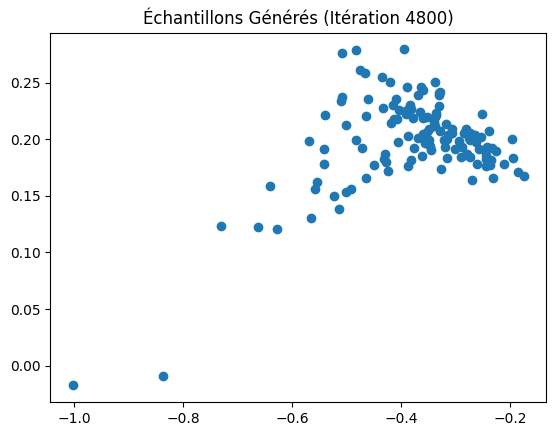

coucou 4801
coucou 4802
coucou 4803
coucou 4804
coucou 4805
coucou 4806
coucou 4807
coucou 4808
coucou 4809
coucou 4810
coucou 4811
coucou 4812
coucou 4813
coucou 4814
coucou 4815
coucou 4816
coucou 4817
coucou 4818
coucou 4819
coucou 4820
coucou 4821
coucou 4822
coucou 4823
coucou 4824
coucou 4825
coucou 4826
coucou 4827
coucou 4828
coucou 4829
coucou 4830
coucou 4831
coucou 4832
coucou 4833
coucou 4834
coucou 4835
coucou 4836
coucou 4837
coucou 4838
coucou 4839
coucou 4840
coucou 4841
coucou 4842
coucou 4843
coucou 4844
coucou 4845
coucou 4846
coucou 4847
coucou 4848
coucou 4849
coucou 4850
coucou 4851
coucou 4852
coucou 4853
coucou 4854
coucou 4855
coucou 4856
coucou 4857
coucou 4858
coucou 4859
coucou 4860
coucou 4861
coucou 4862
coucou 4863
coucou 4864
coucou 4865
coucou 4866
coucou 4867
coucou 4868
coucou 4869
coucou 4870
coucou 4871
coucou 4872
coucou 4873
coucou 4874
coucou 4875
coucou 4876
coucou 4877
coucou 4878
coucou 4879
coucou 4880
coucou 4881
coucou 4882
coucou 4883
couc

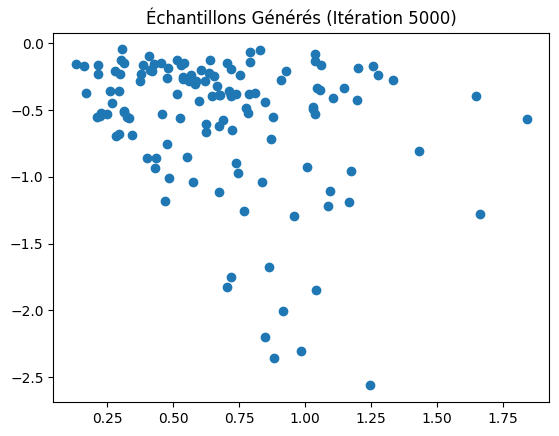

coucou 5001
coucou 5002
coucou 5003
coucou 5004
coucou 5005
coucou 5006
coucou 5007
coucou 5008
coucou 5009
coucou 5010
coucou 5011
coucou 5012
coucou 5013
coucou 5014
coucou 5015
coucou 5016
coucou 5017
coucou 5018
coucou 5019
coucou 5020
coucou 5021
coucou 5022
coucou 5023
coucou 5024
coucou 5025
coucou 5026
coucou 5027
coucou 5028
coucou 5029
coucou 5030
coucou 5031
coucou 5032
coucou 5033
coucou 5034
coucou 5035
coucou 5036
coucou 5037
coucou 5038
coucou 5039
coucou 5040
coucou 5041
coucou 5042
coucou 5043
coucou 5044
coucou 5045
coucou 5046
coucou 5047
coucou 5048
coucou 5049
coucou 5050
coucou 5051
coucou 5052
coucou 5053
coucou 5054
coucou 5055
coucou 5056
coucou 5057
coucou 5058
coucou 5059
coucou 5060
coucou 5061
coucou 5062
coucou 5063
coucou 5064
coucou 5065
coucou 5066
coucou 5067
coucou 5068
coucou 5069
coucou 5070
coucou 5071
coucou 5072
coucou 5073
coucou 5074
coucou 5075
coucou 5076
coucou 5077
coucou 5078
coucou 5079
coucou 5080
coucou 5081
coucou 5082
coucou 5083
couc

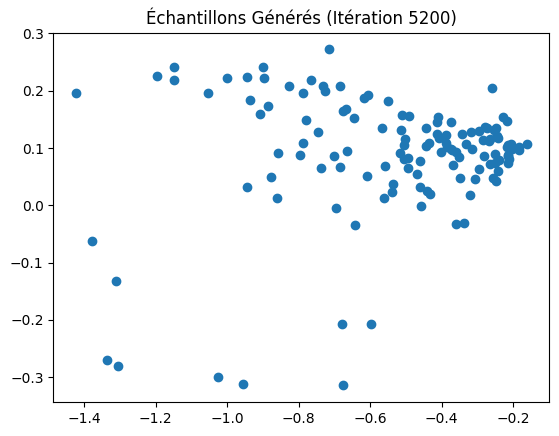

coucou 5201
coucou 5202
coucou 5203
coucou 5204
coucou 5205
coucou 5206
coucou 5207
coucou 5208
coucou 5209
coucou 5210
coucou 5211
coucou 5212
coucou 5213
coucou 5214
coucou 5215
coucou 5216
coucou 5217
coucou 5218
coucou 5219
coucou 5220
coucou 5221
coucou 5222
coucou 5223
coucou 5224
coucou 5225
coucou 5226
coucou 5227
coucou 5228
coucou 5229
coucou 5230
coucou 5231
coucou 5232
coucou 5233
coucou 5234
coucou 5235
coucou 5236
coucou 5237
coucou 5238
coucou 5239
coucou 5240
coucou 5241
coucou 5242
coucou 5243
coucou 5244
coucou 5245
coucou 5246
coucou 5247
coucou 5248
coucou 5249
coucou 5250
coucou 5251
coucou 5252
coucou 5253
coucou 5254
coucou 5255
coucou 5256
coucou 5257
coucou 5258
coucou 5259
coucou 5260
coucou 5261
coucou 5262
coucou 5263
coucou 5264
coucou 5265
coucou 5266
coucou 5267
coucou 5268
coucou 5269
coucou 5270
coucou 5271
coucou 5272
coucou 5273
coucou 5274
coucou 5275
coucou 5276
coucou 5277
coucou 5278
coucou 5279
coucou 5280
coucou 5281
coucou 5282
coucou 5283
couc

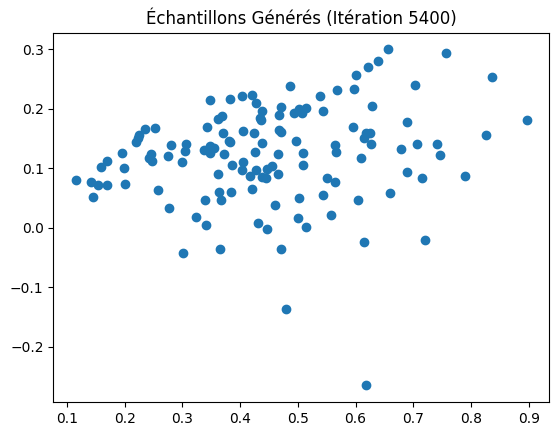

coucou 5401
coucou 5402
coucou 5403
coucou 5404
coucou 5405
coucou 5406
coucou 5407
coucou 5408
coucou 5409
coucou 5410
coucou 5411
coucou 5412
coucou 5413
coucou 5414
coucou 5415
coucou 5416
coucou 5417
coucou 5418
coucou 5419
coucou 5420
coucou 5421
coucou 5422
coucou 5423
coucou 5424
coucou 5425
coucou 5426
coucou 5427
coucou 5428
coucou 5429
coucou 5430
coucou 5431
coucou 5432
coucou 5433
coucou 5434
coucou 5435
coucou 5436
coucou 5437
coucou 5438
coucou 5439
coucou 5440
coucou 5441
coucou 5442
coucou 5443
coucou 5444
coucou 5445
coucou 5446
coucou 5447
coucou 5448
coucou 5449
coucou 5450
coucou 5451
coucou 5452
coucou 5453
coucou 5454
coucou 5455
coucou 5456
coucou 5457
coucou 5458
coucou 5459
coucou 5460
coucou 5461
coucou 5462
coucou 5463
coucou 5464
coucou 5465
coucou 5466
coucou 5467
coucou 5468
coucou 5469
coucou 5470
coucou 5471
coucou 5472
coucou 5473
coucou 5474
coucou 5475
coucou 5476
coucou 5477
coucou 5478
coucou 5479
coucou 5480
coucou 5481
coucou 5482
coucou 5483
couc

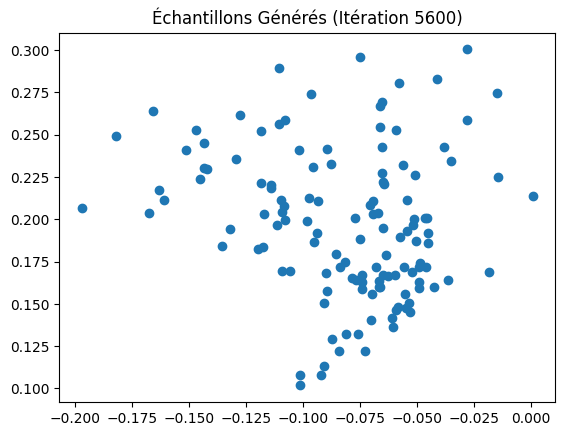

coucou 5601
coucou 5602
coucou 5603
coucou 5604
coucou 5605
coucou 5606
coucou 5607
coucou 5608
coucou 5609
coucou 5610
coucou 5611
coucou 5612
coucou 5613
coucou 5614
coucou 5615
coucou 5616
coucou 5617
coucou 5618
coucou 5619
coucou 5620
coucou 5621
coucou 5622
coucou 5623
coucou 5624
coucou 5625
coucou 5626
coucou 5627
coucou 5628
coucou 5629
coucou 5630
coucou 5631
coucou 5632
coucou 5633
coucou 5634
coucou 5635
coucou 5636
coucou 5637
coucou 5638
coucou 5639
coucou 5640
coucou 5641
coucou 5642
coucou 5643
coucou 5644
coucou 5645
coucou 5646
coucou 5647
coucou 5648
coucou 5649
coucou 5650
coucou 5651
coucou 5652
coucou 5653
coucou 5654
coucou 5655
coucou 5656
coucou 5657
coucou 5658
coucou 5659
coucou 5660
coucou 5661
coucou 5662
coucou 5663
coucou 5664
coucou 5665
coucou 5666
coucou 5667
coucou 5668
coucou 5669
coucou 5670
coucou 5671
coucou 5672
coucou 5673
coucou 5674
coucou 5675
coucou 5676
coucou 5677
coucou 5678
coucou 5679
coucou 5680
coucou 5681
coucou 5682
coucou 5683
couc

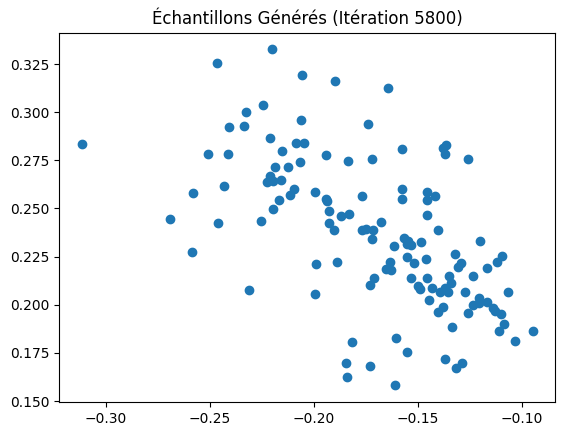

coucou 5801
coucou 5802
coucou 5803
coucou 5804
coucou 5805
coucou 5806
coucou 5807
coucou 5808
coucou 5809
coucou 5810
coucou 5811
coucou 5812
coucou 5813
coucou 5814
coucou 5815
coucou 5816
coucou 5817
coucou 5818
coucou 5819
coucou 5820
coucou 5821
coucou 5822
coucou 5823
coucou 5824
coucou 5825
coucou 5826
coucou 5827
coucou 5828
coucou 5829
coucou 5830
coucou 5831
coucou 5832
coucou 5833
coucou 5834
coucou 5835
coucou 5836
coucou 5837
coucou 5838
coucou 5839
coucou 5840
coucou 5841
coucou 5842
coucou 5843
coucou 5844
coucou 5845
coucou 5846
coucou 5847
coucou 5848
coucou 5849
coucou 5850
coucou 5851
coucou 5852
coucou 5853
coucou 5854
coucou 5855
coucou 5856
coucou 5857
coucou 5858
coucou 5859
coucou 5860
coucou 5861
coucou 5862
coucou 5863
coucou 5864
coucou 5865
coucou 5866
coucou 5867
coucou 5868
coucou 5869
coucou 5870
coucou 5871
coucou 5872
coucou 5873
coucou 5874
coucou 5875
coucou 5876
coucou 5877
coucou 5878
coucou 5879
coucou 5880
coucou 5881
coucou 5882
coucou 5883
couc

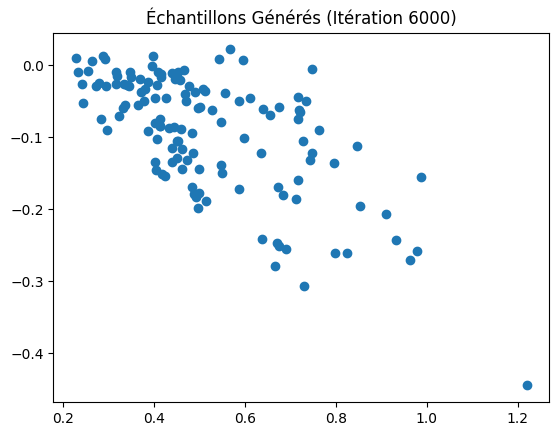

coucou 6001
coucou 6002
coucou 6003
coucou 6004
coucou 6005
coucou 6006
coucou 6007
coucou 6008
coucou 6009
coucou 6010
coucou 6011
coucou 6012
coucou 6013
coucou 6014
coucou 6015
coucou 6016
coucou 6017
coucou 6018
coucou 6019
coucou 6020
coucou 6021
coucou 6022
coucou 6023
coucou 6024
coucou 6025
coucou 6026
coucou 6027
coucou 6028
coucou 6029
coucou 6030
coucou 6031
coucou 6032
coucou 6033
coucou 6034
coucou 6035
coucou 6036
coucou 6037
coucou 6038
coucou 6039
coucou 6040
coucou 6041
coucou 6042
coucou 6043
coucou 6044
coucou 6045
coucou 6046
coucou 6047
coucou 6048
coucou 6049
coucou 6050
coucou 6051
coucou 6052
coucou 6053
coucou 6054
coucou 6055
coucou 6056
coucou 6057
coucou 6058
coucou 6059
coucou 6060
coucou 6061
coucou 6062
coucou 6063
coucou 6064
coucou 6065
coucou 6066
coucou 6067
coucou 6068
coucou 6069
coucou 6070
coucou 6071
coucou 6072
coucou 6073
coucou 6074
coucou 6075
coucou 6076
coucou 6077
coucou 6078
coucou 6079
coucou 6080
coucou 6081
coucou 6082
coucou 6083
couc

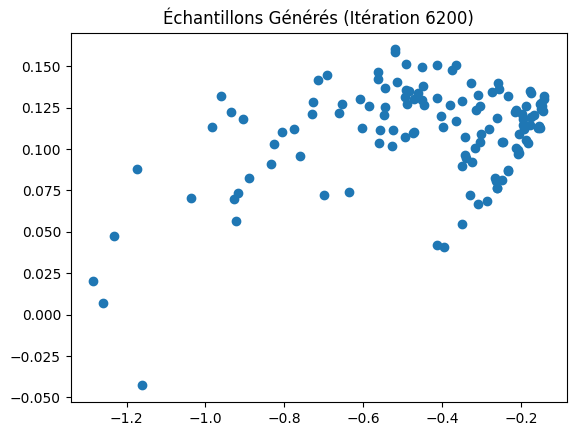

coucou 6201
coucou 6202
coucou 6203
coucou 6204
coucou 6205
coucou 6206
coucou 6207
coucou 6208
coucou 6209
coucou 6210
coucou 6211
coucou 6212
coucou 6213
coucou 6214
coucou 6215
coucou 6216
coucou 6217
coucou 6218
coucou 6219
coucou 6220
coucou 6221
coucou 6222
coucou 6223
coucou 6224
coucou 6225
coucou 6226
coucou 6227
coucou 6228
coucou 6229
coucou 6230
coucou 6231
coucou 6232
coucou 6233
coucou 6234
coucou 6235
coucou 6236
coucou 6237
coucou 6238
coucou 6239
coucou 6240
coucou 6241
coucou 6242
coucou 6243
coucou 6244
coucou 6245
coucou 6246
coucou 6247
coucou 6248
coucou 6249
coucou 6250
coucou 6251
coucou 6252
coucou 6253
coucou 6254
coucou 6255
coucou 6256
coucou 6257
coucou 6258
coucou 6259
coucou 6260
coucou 6261
coucou 6262
coucou 6263
coucou 6264
coucou 6265
coucou 6266
coucou 6267
coucou 6268
coucou 6269
coucou 6270
coucou 6271
coucou 6272
coucou 6273
coucou 6274
coucou 6275
coucou 6276
coucou 6277
coucou 6278
coucou 6279
coucou 6280
coucou 6281
coucou 6282
coucou 6283
couc

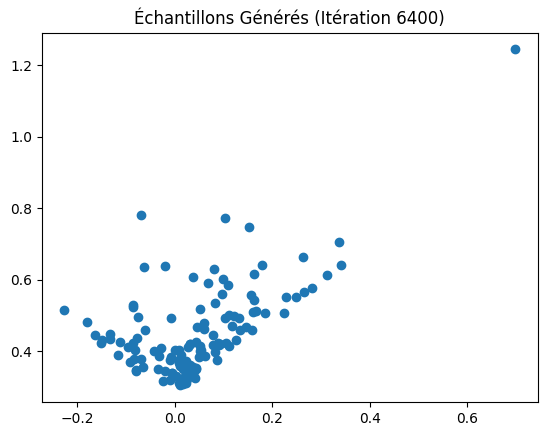

coucou 6401
coucou 6402
coucou 6403
coucou 6404
coucou 6405
coucou 6406
coucou 6407
coucou 6408
coucou 6409
coucou 6410
coucou 6411
coucou 6412
coucou 6413
coucou 6414
coucou 6415
coucou 6416
coucou 6417
coucou 6418
coucou 6419
coucou 6420
coucou 6421
coucou 6422
coucou 6423
coucou 6424
coucou 6425
coucou 6426
coucou 6427
coucou 6428
coucou 6429
coucou 6430
coucou 6431
coucou 6432
coucou 6433
coucou 6434
coucou 6435
coucou 6436
coucou 6437
coucou 6438
coucou 6439
coucou 6440
coucou 6441
coucou 6442
coucou 6443
coucou 6444
coucou 6445
coucou 6446
coucou 6447
coucou 6448
coucou 6449
coucou 6450
coucou 6451
coucou 6452
coucou 6453
coucou 6454
coucou 6455
coucou 6456
coucou 6457
coucou 6458
coucou 6459
coucou 6460
coucou 6461
coucou 6462
coucou 6463
coucou 6464
coucou 6465
coucou 6466
coucou 6467
coucou 6468
coucou 6469
coucou 6470
coucou 6471
coucou 6472
coucou 6473
coucou 6474
coucou 6475
coucou 6476
coucou 6477
coucou 6478
coucou 6479
coucou 6480
coucou 6481
coucou 6482
coucou 6483
couc

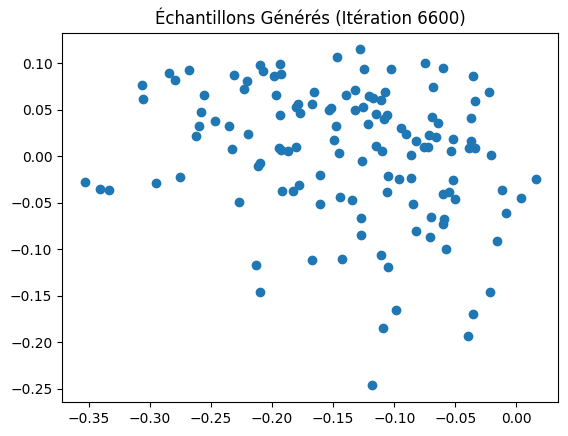

coucou 6601
coucou 6602
coucou 6603
coucou 6604
coucou 6605
coucou 6606
coucou 6607
coucou 6608
coucou 6609
coucou 6610
coucou 6611
coucou 6612
coucou 6613
coucou 6614
coucou 6615
coucou 6616
coucou 6617
coucou 6618
coucou 6619
coucou 6620
coucou 6621
coucou 6622
coucou 6623
coucou 6624
coucou 6625
coucou 6626
coucou 6627
coucou 6628
coucou 6629
coucou 6630
coucou 6631
coucou 6632
coucou 6633
coucou 6634
coucou 6635
coucou 6636
coucou 6637
coucou 6638
coucou 6639
coucou 6640
coucou 6641
coucou 6642
coucou 6643
coucou 6644
coucou 6645
coucou 6646
coucou 6647
coucou 6648
coucou 6649
coucou 6650
coucou 6651
coucou 6652
coucou 6653
coucou 6654
coucou 6655
coucou 6656
coucou 6657
coucou 6658
coucou 6659
coucou 6660
coucou 6661
coucou 6662
coucou 6663
coucou 6664
coucou 6665
coucou 6666
coucou 6667
coucou 6668
coucou 6669
coucou 6670
coucou 6671
coucou 6672
coucou 6673
coucou 6674
coucou 6675
coucou 6676
coucou 6677
coucou 6678
coucou 6679
coucou 6680
coucou 6681
coucou 6682
coucou 6683
couc

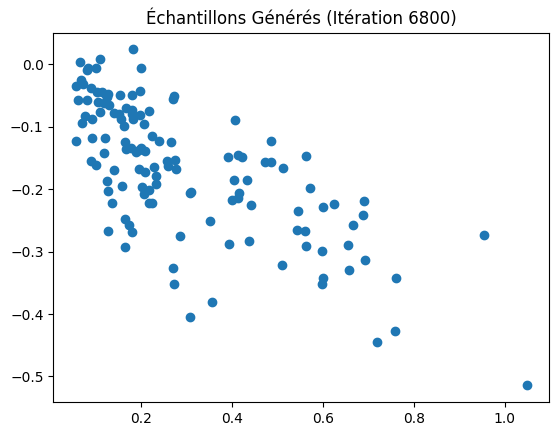

coucou 6801
coucou 6802
coucou 6803
coucou 6804
coucou 6805
coucou 6806
coucou 6807
coucou 6808
coucou 6809
coucou 6810
coucou 6811
coucou 6812
coucou 6813
coucou 6814
coucou 6815
coucou 6816
coucou 6817
coucou 6818
coucou 6819
coucou 6820
coucou 6821
coucou 6822
coucou 6823
coucou 6824
coucou 6825
coucou 6826
coucou 6827
coucou 6828
coucou 6829
coucou 6830
coucou 6831
coucou 6832
coucou 6833
coucou 6834
coucou 6835
coucou 6836
coucou 6837
coucou 6838
coucou 6839
coucou 6840
coucou 6841
coucou 6842
coucou 6843
coucou 6844
coucou 6845
coucou 6846
coucou 6847
coucou 6848
coucou 6849
coucou 6850
coucou 6851
coucou 6852
coucou 6853
coucou 6854
coucou 6855
coucou 6856
coucou 6857
coucou 6858
coucou 6859
coucou 6860
coucou 6861
coucou 6862
coucou 6863
coucou 6864
coucou 6865
coucou 6866
coucou 6867
coucou 6868
coucou 6869
coucou 6870
coucou 6871
coucou 6872
coucou 6873
coucou 6874
coucou 6875
coucou 6876
coucou 6877
coucou 6878
coucou 6879
coucou 6880
coucou 6881
coucou 6882
coucou 6883
couc

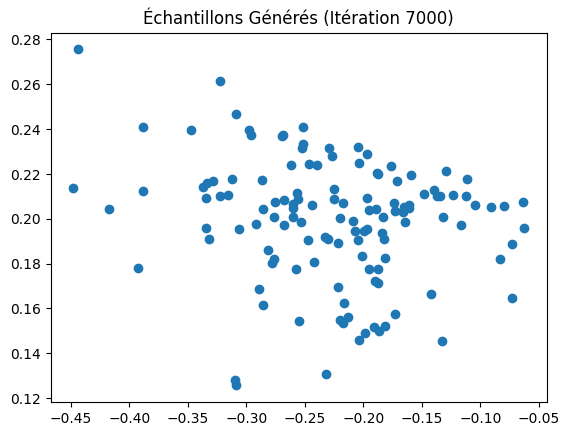

coucou 7001
coucou 7002
coucou 7003
coucou 7004
coucou 7005
coucou 7006
coucou 7007
coucou 7008
coucou 7009
coucou 7010
coucou 7011
coucou 7012
coucou 7013
coucou 7014
coucou 7015
coucou 7016
coucou 7017
coucou 7018
coucou 7019
coucou 7020
coucou 7021
coucou 7022
coucou 7023
coucou 7024
coucou 7025
coucou 7026
coucou 7027
coucou 7028
coucou 7029
coucou 7030
coucou 7031
coucou 7032
coucou 7033
coucou 7034
coucou 7035
coucou 7036
coucou 7037
coucou 7038
coucou 7039
coucou 7040
coucou 7041
coucou 7042
coucou 7043
coucou 7044
coucou 7045
coucou 7046
coucou 7047
coucou 7048
coucou 7049
coucou 7050
coucou 7051
coucou 7052
coucou 7053
coucou 7054
coucou 7055
coucou 7056
coucou 7057
coucou 7058
coucou 7059
coucou 7060
coucou 7061
coucou 7062
coucou 7063
coucou 7064
coucou 7065
coucou 7066
coucou 7067
coucou 7068
coucou 7069
coucou 7070
coucou 7071
coucou 7072
coucou 7073
coucou 7074
coucou 7075
coucou 7076
coucou 7077
coucou 7078
coucou 7079
coucou 7080
coucou 7081
coucou 7082
coucou 7083
couc

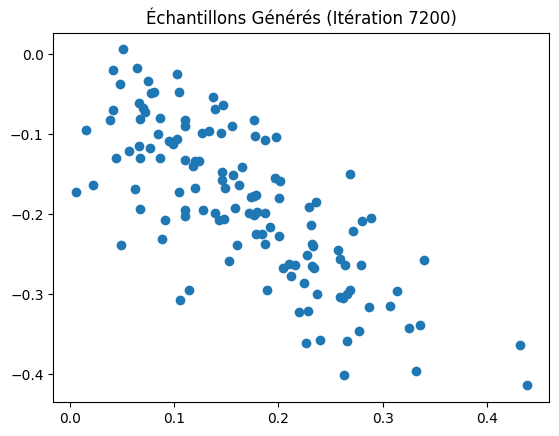

coucou 7201
coucou 7202
coucou 7203
coucou 7204
coucou 7205
coucou 7206
coucou 7207
coucou 7208
coucou 7209
coucou 7210
coucou 7211
coucou 7212
coucou 7213
coucou 7214
coucou 7215
coucou 7216
coucou 7217
coucou 7218
coucou 7219
coucou 7220
coucou 7221
coucou 7222
coucou 7223
coucou 7224
coucou 7225
coucou 7226
coucou 7227
coucou 7228
coucou 7229
coucou 7230
coucou 7231
coucou 7232
coucou 7233
coucou 7234
coucou 7235
coucou 7236
coucou 7237
coucou 7238
coucou 7239
coucou 7240
coucou 7241
coucou 7242
coucou 7243
coucou 7244
coucou 7245
coucou 7246
coucou 7247
coucou 7248
coucou 7249
coucou 7250
coucou 7251
coucou 7252
coucou 7253
coucou 7254
coucou 7255
coucou 7256
coucou 7257
coucou 7258
coucou 7259
coucou 7260
coucou 7261
coucou 7262
coucou 7263
coucou 7264
coucou 7265
coucou 7266
coucou 7267
coucou 7268
coucou 7269
coucou 7270
coucou 7271
coucou 7272
coucou 7273
coucou 7274
coucou 7275
coucou 7276
coucou 7277
coucou 7278
coucou 7279
coucou 7280
coucou 7281
coucou 7282
coucou 7283
couc

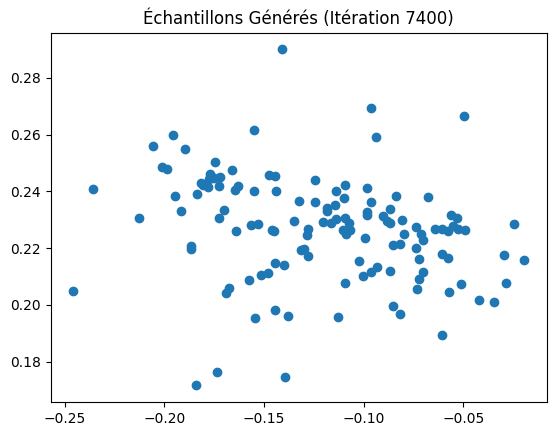

coucou 7401
coucou 7402
coucou 7403
coucou 7404
coucou 7405
coucou 7406
coucou 7407
coucou 7408
coucou 7409
coucou 7410
coucou 7411
coucou 7412
coucou 7413
coucou 7414
coucou 7415
coucou 7416
coucou 7417
coucou 7418
coucou 7419
coucou 7420
coucou 7421
coucou 7422
coucou 7423
coucou 7424
coucou 7425
coucou 7426
coucou 7427
coucou 7428
coucou 7429
coucou 7430
coucou 7431
coucou 7432
coucou 7433
coucou 7434
coucou 7435
coucou 7436
coucou 7437
coucou 7438
coucou 7439
coucou 7440
coucou 7441
coucou 7442
coucou 7443
coucou 7444
coucou 7445
coucou 7446
coucou 7447
coucou 7448
coucou 7449
coucou 7450
coucou 7451
coucou 7452
coucou 7453
coucou 7454
coucou 7455
coucou 7456
coucou 7457
coucou 7458
coucou 7459
coucou 7460
coucou 7461
coucou 7462
coucou 7463
coucou 7464
coucou 7465
coucou 7466
coucou 7467
coucou 7468
coucou 7469
coucou 7470
coucou 7471
coucou 7472
coucou 7473
coucou 7474
coucou 7475
coucou 7476
coucou 7477
coucou 7478
coucou 7479
coucou 7480
coucou 7481
coucou 7482
coucou 7483
couc

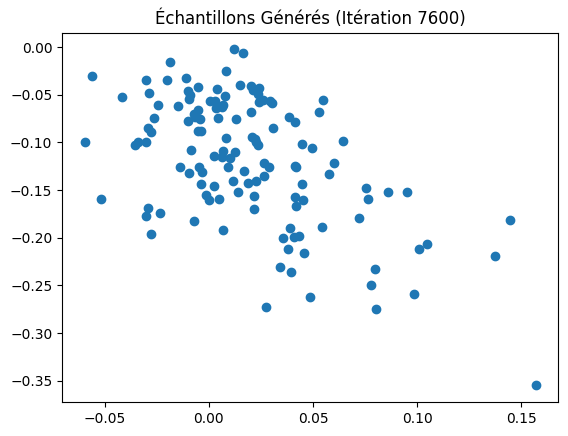

coucou 7601
coucou 7602
coucou 7603
coucou 7604
coucou 7605
coucou 7606
coucou 7607
coucou 7608
coucou 7609
coucou 7610
coucou 7611
coucou 7612
coucou 7613
coucou 7614
coucou 7615
coucou 7616
coucou 7617
coucou 7618
coucou 7619
coucou 7620
coucou 7621
coucou 7622
coucou 7623
coucou 7624
coucou 7625
coucou 7626
coucou 7627
coucou 7628
coucou 7629
coucou 7630
coucou 7631
coucou 7632
coucou 7633
coucou 7634
coucou 7635
coucou 7636
coucou 7637
coucou 7638
coucou 7639
coucou 7640
coucou 7641
coucou 7642
coucou 7643
coucou 7644
coucou 7645
coucou 7646
coucou 7647
coucou 7648
coucou 7649
coucou 7650
coucou 7651
coucou 7652
coucou 7653
coucou 7654
coucou 7655
coucou 7656
coucou 7657
coucou 7658
coucou 7659
coucou 7660
coucou 7661
coucou 7662
coucou 7663
coucou 7664
coucou 7665
coucou 7666
coucou 7667
coucou 7668
coucou 7669
coucou 7670
coucou 7671
coucou 7672
coucou 7673
coucou 7674
coucou 7675
coucou 7676
coucou 7677
coucou 7678
coucou 7679
coucou 7680
coucou 7681
coucou 7682
coucou 7683
couc

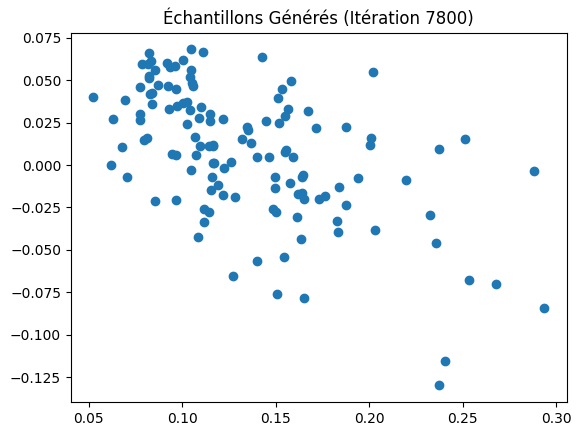

coucou 7801
coucou 7802
coucou 7803
coucou 7804
coucou 7805
coucou 7806
coucou 7807
coucou 7808
coucou 7809
coucou 7810
coucou 7811
coucou 7812
coucou 7813
coucou 7814
coucou 7815
coucou 7816
coucou 7817
coucou 7818
coucou 7819
coucou 7820
coucou 7821
coucou 7822
coucou 7823
coucou 7824
coucou 7825
coucou 7826
coucou 7827
coucou 7828
coucou 7829
coucou 7830
coucou 7831
coucou 7832
coucou 7833
coucou 7834
coucou 7835
coucou 7836
coucou 7837
coucou 7838
coucou 7839
coucou 7840
coucou 7841
coucou 7842
coucou 7843
coucou 7844
coucou 7845
coucou 7846
coucou 7847
coucou 7848
coucou 7849
coucou 7850
coucou 7851
coucou 7852
coucou 7853
coucou 7854
coucou 7855
coucou 7856
coucou 7857
coucou 7858
coucou 7859
coucou 7860
coucou 7861
coucou 7862
coucou 7863
coucou 7864
coucou 7865
coucou 7866
coucou 7867
coucou 7868
coucou 7869
coucou 7870
coucou 7871
coucou 7872
coucou 7873
coucou 7874
coucou 7875
coucou 7876
coucou 7877
coucou 7878
coucou 7879
coucou 7880
coucou 7881
coucou 7882
coucou 7883
couc

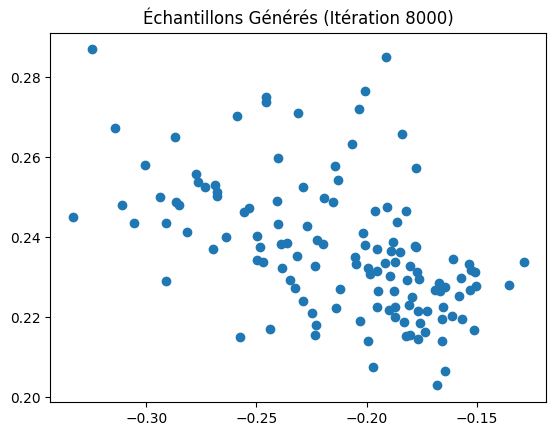

coucou 8001
coucou 8002
coucou 8003
coucou 8004
coucou 8005
coucou 8006
coucou 8007
coucou 8008
coucou 8009
coucou 8010
coucou 8011
coucou 8012
coucou 8013
coucou 8014
coucou 8015
coucou 8016
coucou 8017
coucou 8018
coucou 8019
coucou 8020
coucou 8021
coucou 8022
coucou 8023
coucou 8024
coucou 8025
coucou 8026
coucou 8027
coucou 8028
coucou 8029
coucou 8030
coucou 8031
coucou 8032
coucou 8033
coucou 8034
coucou 8035
coucou 8036
coucou 8037
coucou 8038
coucou 8039
coucou 8040
coucou 8041
coucou 8042
coucou 8043
coucou 8044
coucou 8045
coucou 8046
coucou 8047
coucou 8048
coucou 8049
coucou 8050
coucou 8051
coucou 8052
coucou 8053
coucou 8054
coucou 8055
coucou 8056
coucou 8057
coucou 8058
coucou 8059
coucou 8060
coucou 8061
coucou 8062
coucou 8063
coucou 8064
coucou 8065
coucou 8066
coucou 8067
coucou 8068
coucou 8069
coucou 8070
coucou 8071
coucou 8072
coucou 8073
coucou 8074
coucou 8075
coucou 8076
coucou 8077
coucou 8078
coucou 8079
coucou 8080
coucou 8081
coucou 8082
coucou 8083
couc

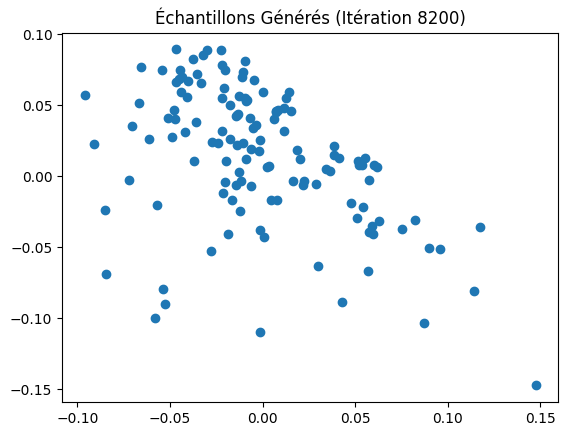

coucou 8201
coucou 8202
coucou 8203
coucou 8204
coucou 8205
coucou 8206
coucou 8207
coucou 8208
coucou 8209
coucou 8210
coucou 8211
coucou 8212
coucou 8213
coucou 8214
coucou 8215
coucou 8216
coucou 8217
coucou 8218
coucou 8219
coucou 8220
coucou 8221
coucou 8222
coucou 8223
coucou 8224
coucou 8225
coucou 8226
coucou 8227
coucou 8228
coucou 8229
coucou 8230
coucou 8231
coucou 8232
coucou 8233
coucou 8234
coucou 8235
coucou 8236
coucou 8237
coucou 8238
coucou 8239
coucou 8240
coucou 8241
coucou 8242
coucou 8243
coucou 8244
coucou 8245
coucou 8246
coucou 8247
coucou 8248
coucou 8249
coucou 8250
coucou 8251
coucou 8252
coucou 8253
coucou 8254
coucou 8255
coucou 8256
coucou 8257
coucou 8258
coucou 8259
coucou 8260
coucou 8261
coucou 8262
coucou 8263
coucou 8264
coucou 8265
coucou 8266
coucou 8267
coucou 8268
coucou 8269
coucou 8270
coucou 8271
coucou 8272
coucou 8273
coucou 8274
coucou 8275
coucou 8276
coucou 8277
coucou 8278
coucou 8279
coucou 8280
coucou 8281
coucou 8282
coucou 8283
couc

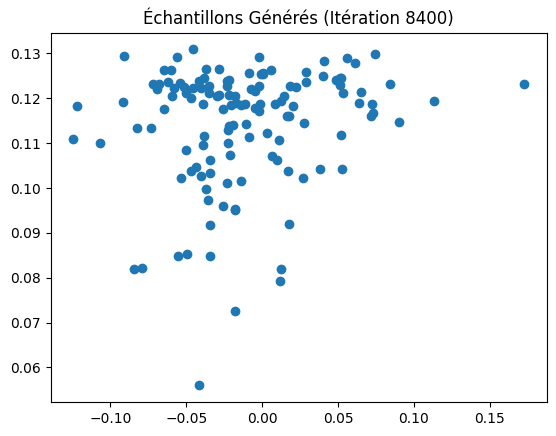

coucou 8401
coucou 8402
coucou 8403
coucou 8404
coucou 8405
coucou 8406
coucou 8407
coucou 8408
coucou 8409
coucou 8410
coucou 8411
coucou 8412
coucou 8413
coucou 8414
coucou 8415
coucou 8416
coucou 8417
coucou 8418
coucou 8419
coucou 8420
coucou 8421
coucou 8422
coucou 8423
coucou 8424
coucou 8425
coucou 8426
coucou 8427
coucou 8428
coucou 8429
coucou 8430
coucou 8431
coucou 8432
coucou 8433
coucou 8434
coucou 8435
coucou 8436
coucou 8437
coucou 8438
coucou 8439
coucou 8440
coucou 8441
coucou 8442
coucou 8443
coucou 8444
coucou 8445
coucou 8446
coucou 8447
coucou 8448
coucou 8449
coucou 8450
coucou 8451
coucou 8452
coucou 8453
coucou 8454
coucou 8455
coucou 8456
coucou 8457
coucou 8458
coucou 8459
coucou 8460
coucou 8461
coucou 8462
coucou 8463
coucou 8464
coucou 8465
coucou 8466
coucou 8467
coucou 8468
coucou 8469
coucou 8470
coucou 8471
coucou 8472
coucou 8473
coucou 8474
coucou 8475
coucou 8476
coucou 8477
coucou 8478
coucou 8479
coucou 8480
coucou 8481
coucou 8482
coucou 8483
couc

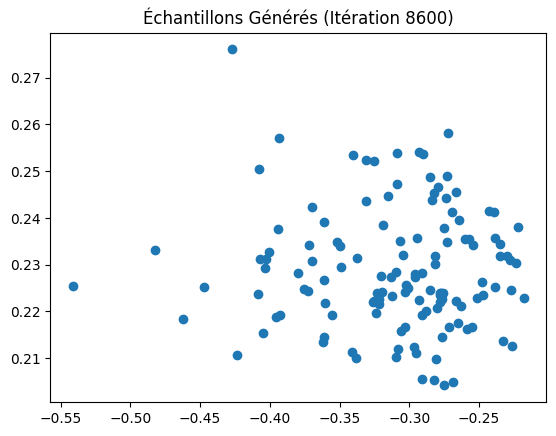

coucou 8601
coucou 8602
coucou 8603
coucou 8604
coucou 8605
coucou 8606
coucou 8607
coucou 8608
coucou 8609
coucou 8610
coucou 8611
coucou 8612
coucou 8613
coucou 8614
coucou 8615
coucou 8616
coucou 8617
coucou 8618
coucou 8619
coucou 8620
coucou 8621
coucou 8622
coucou 8623
coucou 8624
coucou 8625
coucou 8626
coucou 8627
coucou 8628
coucou 8629
coucou 8630
coucou 8631
coucou 8632
coucou 8633
coucou 8634
coucou 8635
coucou 8636
coucou 8637
coucou 8638
coucou 8639
coucou 8640
coucou 8641
coucou 8642
coucou 8643
coucou 8644
coucou 8645
coucou 8646
coucou 8647
coucou 8648
coucou 8649
coucou 8650
coucou 8651
coucou 8652
coucou 8653
coucou 8654
coucou 8655
coucou 8656
coucou 8657
coucou 8658
coucou 8659
coucou 8660
coucou 8661
coucou 8662
coucou 8663
coucou 8664
coucou 8665
coucou 8666
coucou 8667
coucou 8668
coucou 8669
coucou 8670
coucou 8671
coucou 8672
coucou 8673
coucou 8674
coucou 8675
coucou 8676
coucou 8677
coucou 8678
coucou 8679
coucou 8680
coucou 8681
coucou 8682
coucou 8683
couc

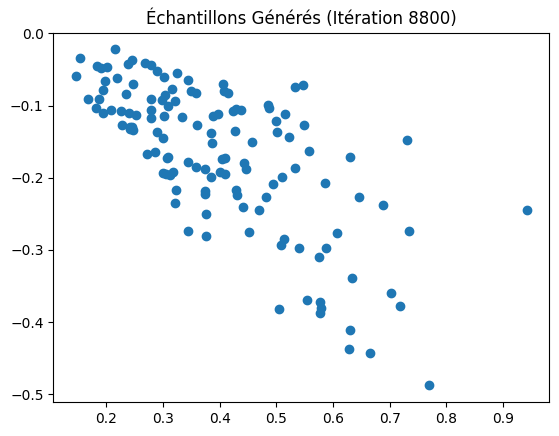

coucou 8801
coucou 8802
coucou 8803
coucou 8804
coucou 8805
coucou 8806
coucou 8807
coucou 8808
coucou 8809
coucou 8810
coucou 8811
coucou 8812
coucou 8813
coucou 8814
coucou 8815
coucou 8816
coucou 8817
coucou 8818
coucou 8819
coucou 8820
coucou 8821
coucou 8822
coucou 8823
coucou 8824
coucou 8825
coucou 8826
coucou 8827
coucou 8828
coucou 8829
coucou 8830
coucou 8831
coucou 8832
coucou 8833
coucou 8834
coucou 8835
coucou 8836
coucou 8837
coucou 8838
coucou 8839
coucou 8840
coucou 8841
coucou 8842
coucou 8843
coucou 8844
coucou 8845
coucou 8846
coucou 8847
coucou 8848
coucou 8849
coucou 8850
coucou 8851
coucou 8852
coucou 8853
coucou 8854
coucou 8855
coucou 8856
coucou 8857
coucou 8858
coucou 8859
coucou 8860
coucou 8861
coucou 8862
coucou 8863
coucou 8864
coucou 8865
coucou 8866
coucou 8867
coucou 8868
coucou 8869
coucou 8870
coucou 8871
coucou 8872
coucou 8873
coucou 8874
coucou 8875
coucou 8876
coucou 8877
coucou 8878
coucou 8879
coucou 8880
coucou 8881
coucou 8882
coucou 8883
couc

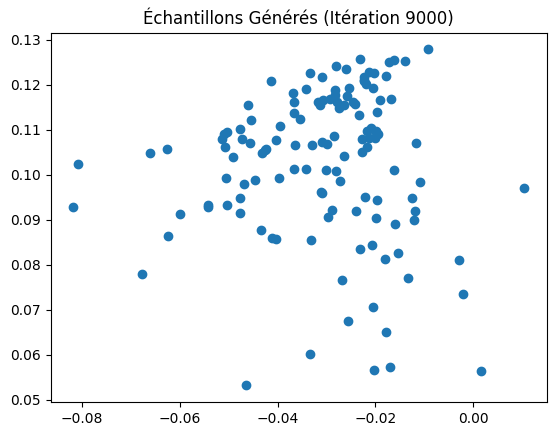

coucou 9001
coucou 9002
coucou 9003
coucou 9004
coucou 9005
coucou 9006
coucou 9007
coucou 9008
coucou 9009
coucou 9010
coucou 9011
coucou 9012
coucou 9013
coucou 9014
coucou 9015
coucou 9016
coucou 9017
coucou 9018
coucou 9019
coucou 9020
coucou 9021
coucou 9022
coucou 9023
coucou 9024
coucou 9025
coucou 9026
coucou 9027
coucou 9028
coucou 9029
coucou 9030
coucou 9031
coucou 9032
coucou 9033
coucou 9034
coucou 9035
coucou 9036
coucou 9037
coucou 9038
coucou 9039
coucou 9040
coucou 9041
coucou 9042
coucou 9043
coucou 9044
coucou 9045
coucou 9046
coucou 9047
coucou 9048
coucou 9049
coucou 9050
coucou 9051
coucou 9052
coucou 9053
coucou 9054
coucou 9055
coucou 9056
coucou 9057
coucou 9058
coucou 9059
coucou 9060
coucou 9061
coucou 9062
coucou 9063
coucou 9064
coucou 9065
coucou 9066
coucou 9067
coucou 9068
coucou 9069
coucou 9070
coucou 9071
coucou 9072
coucou 9073
coucou 9074
coucou 9075
coucou 9076
coucou 9077
coucou 9078
coucou 9079
coucou 9080
coucou 9081
coucou 9082
coucou 9083
couc

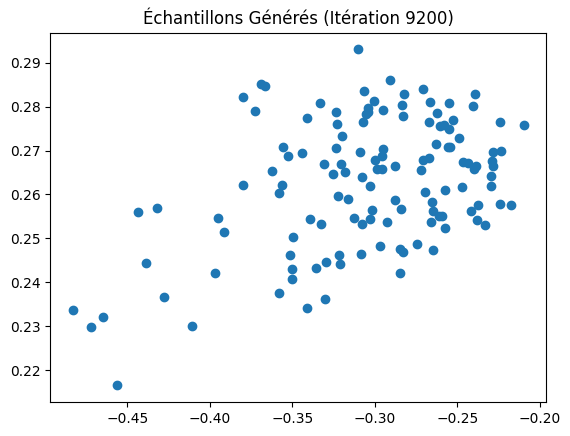

coucou 9201
coucou 9202
coucou 9203
coucou 9204
coucou 9205
coucou 9206
coucou 9207
coucou 9208
coucou 9209
coucou 9210
coucou 9211
coucou 9212
coucou 9213
coucou 9214
coucou 9215
coucou 9216
coucou 9217
coucou 9218
coucou 9219
coucou 9220
coucou 9221
coucou 9222
coucou 9223
coucou 9224
coucou 9225
coucou 9226
coucou 9227
coucou 9228
coucou 9229
coucou 9230
coucou 9231
coucou 9232
coucou 9233
coucou 9234
coucou 9235
coucou 9236
coucou 9237
coucou 9238
coucou 9239
coucou 9240
coucou 9241
coucou 9242
coucou 9243
coucou 9244
coucou 9245
coucou 9246
coucou 9247
coucou 9248
coucou 9249
coucou 9250
coucou 9251
coucou 9252
coucou 9253
coucou 9254
coucou 9255
coucou 9256
coucou 9257
coucou 9258
coucou 9259
coucou 9260
coucou 9261
coucou 9262
coucou 9263
coucou 9264
coucou 9265
coucou 9266
coucou 9267
coucou 9268
coucou 9269
coucou 9270
coucou 9271
coucou 9272
coucou 9273
coucou 9274
coucou 9275
coucou 9276
coucou 9277
coucou 9278
coucou 9279
coucou 9280
coucou 9281
coucou 9282
coucou 9283
couc

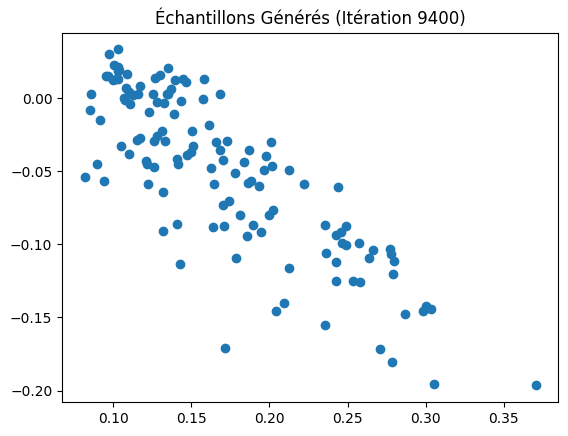

coucou 9401
coucou 9402
coucou 9403
coucou 9404
coucou 9405
coucou 9406
coucou 9407
coucou 9408
coucou 9409
coucou 9410
coucou 9411
coucou 9412
coucou 9413
coucou 9414
coucou 9415
coucou 9416
coucou 9417
coucou 9418
coucou 9419
coucou 9420
coucou 9421
coucou 9422
coucou 9423
coucou 9424
coucou 9425
coucou 9426
coucou 9427
coucou 9428
coucou 9429
coucou 9430
coucou 9431
coucou 9432
coucou 9433
coucou 9434
coucou 9435
coucou 9436
coucou 9437
coucou 9438
coucou 9439
coucou 9440
coucou 9441
coucou 9442
coucou 9443
coucou 9444
coucou 9445
coucou 9446
coucou 9447
coucou 9448
coucou 9449
coucou 9450
coucou 9451
coucou 9452
coucou 9453
coucou 9454
coucou 9455
coucou 9456
coucou 9457
coucou 9458
coucou 9459
coucou 9460
coucou 9461
coucou 9462
coucou 9463
coucou 9464
coucou 9465
coucou 9466
coucou 9467
coucou 9468
coucou 9469
coucou 9470
coucou 9471
coucou 9472
coucou 9473
coucou 9474
coucou 9475
coucou 9476
coucou 9477
coucou 9478
coucou 9479
coucou 9480
coucou 9481
coucou 9482
coucou 9483
couc

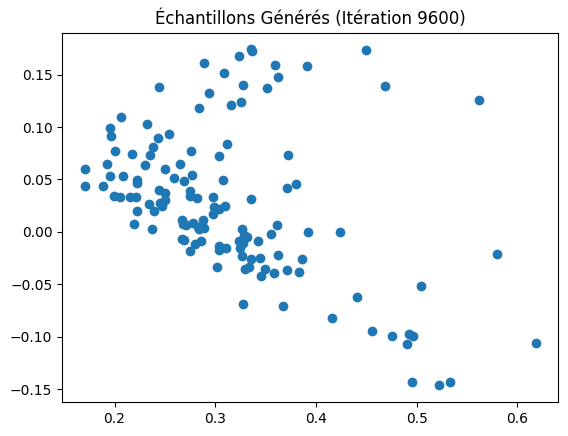

coucou 9601
coucou 9602
coucou 9603
coucou 9604
coucou 9605
coucou 9606
coucou 9607
coucou 9608
coucou 9609
coucou 9610
coucou 9611
coucou 9612
coucou 9613
coucou 9614
coucou 9615
coucou 9616
coucou 9617
coucou 9618
coucou 9619
coucou 9620
coucou 9621
coucou 9622
coucou 9623
coucou 9624
coucou 9625
coucou 9626
coucou 9627
coucou 9628
coucou 9629
coucou 9630
coucou 9631
coucou 9632
coucou 9633
coucou 9634
coucou 9635
coucou 9636
coucou 9637
coucou 9638
coucou 9639
coucou 9640
coucou 9641
coucou 9642
coucou 9643
coucou 9644
coucou 9645
coucou 9646
coucou 9647
coucou 9648
coucou 9649
coucou 9650
coucou 9651
coucou 9652
coucou 9653
coucou 9654
coucou 9655
coucou 9656
coucou 9657
coucou 9658
coucou 9659
coucou 9660
coucou 9661
coucou 9662
coucou 9663
coucou 9664
coucou 9665
coucou 9666
coucou 9667
coucou 9668
coucou 9669
coucou 9670
coucou 9671
coucou 9672
coucou 9673
coucou 9674
coucou 9675
coucou 9676
coucou 9677
coucou 9678
coucou 9679
coucou 9680
coucou 9681
coucou 9682
coucou 9683
couc

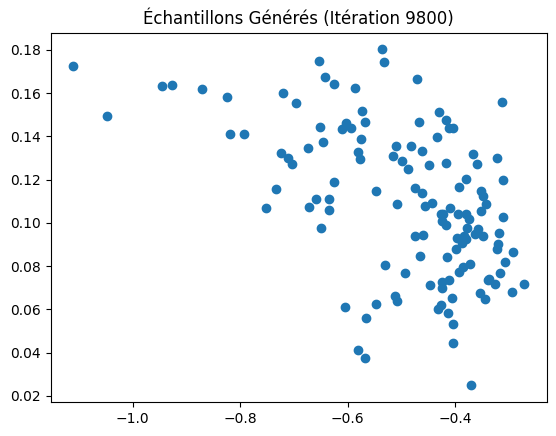

coucou 9801
coucou 9802
coucou 9803
coucou 9804
coucou 9805
coucou 9806
coucou 9807
coucou 9808
coucou 9809
coucou 9810
coucou 9811
coucou 9812
coucou 9813
coucou 9814
coucou 9815
coucou 9816
coucou 9817
coucou 9818
coucou 9819
coucou 9820
coucou 9821
coucou 9822
coucou 9823
coucou 9824
coucou 9825
coucou 9826
coucou 9827
coucou 9828
coucou 9829
coucou 9830
coucou 9831
coucou 9832
coucou 9833
coucou 9834
coucou 9835
coucou 9836
coucou 9837
coucou 9838
coucou 9839
coucou 9840
coucou 9841
coucou 9842
coucou 9843
coucou 9844
coucou 9845
coucou 9846
coucou 9847
coucou 9848
coucou 9849
coucou 9850
coucou 9851
coucou 9852
coucou 9853
coucou 9854
coucou 9855
coucou 9856
coucou 9857
coucou 9858
coucou 9859
coucou 9860
coucou 9861
coucou 9862
coucou 9863
coucou 9864
coucou 9865
coucou 9866
coucou 9867
coucou 9868
coucou 9869
coucou 9870
coucou 9871
coucou 9872
coucou 9873
coucou 9874
coucou 9875
coucou 9876
coucou 9877
coucou 9878
coucou 9879
coucou 9880
coucou 9881
coucou 9882
coucou 9883
couc

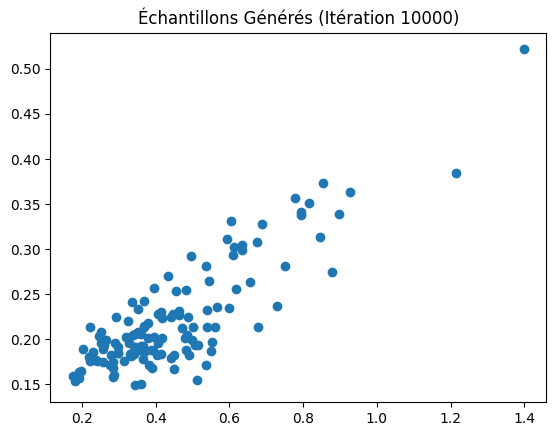

In [25]:
N_iter = 10001
n_batch = 128
latent_dim = 5


# model_discr.fit(y_train,s_train,epochs=300,batch_size=32)
# model_discr.trainable = False

for i in range(N_iter):
    # generation des donnees
    X_true,s_true = generate_reel_samples(n_batch//2)
    X_fake, s_fake = generate_fake_samples(model_gen,latent_dim,n_batch//2)
    
    X = np.concatenate((X_true,X_fake))
    s = np.concatenate((s_true,s_fake))
    
    
    #entrainement du discriminateur
    model_discr.trainable = True
    model_discr.train_on_batch(X,s)
    model_discr.trainalbe = False
    
    # generation du bruit
    noise = np.random.randn(n_batch,latent_dim)
    
    # on veut que des un en sortie
    y = np.ones(n_batch)
    
    # entrainement du gan
    model_gan.train_on_batch(noise,y)
    print("coucou", i)
    
    
    # sauvegarde des graphiques toutes les 200 itération
    if (i % 200 == 0):
        noise = np.random.randn(n_batch, latent_dim)
        y_gen = model_gen.predict(noise)
        plt.scatter(y_gen[:,0],y_gen[:,1])
        plt.title(f'Échantillons Générés (Itération {i})')
        plt.show()
#         plt.savefig(f'imgs_gen_samples/{i}.png')
        plt.close()  # Fermer le graphique après la sauvegarde

# test gan

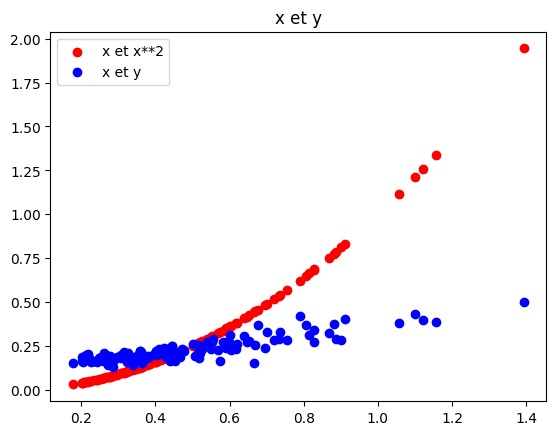

In [26]:
np.random.seed(50)
tf.random.set_seed(50)

noise = np.random.randn(n_batch, latent_dim)
y_test = model_gen.predict(noise)

# courbe vraie valeur
plt.scatter(y_test[:,0],y_test[:,0]**2,label='x et x**2',c='r')
plt.title('x et x**2')

# courbe valeur entrainee
plt.scatter(y_test[:,0],y_test[:,1],label='x et y',c='b')
plt.title('x et y')

plt.legend()  # Ajoute une légende pour distinguer les deux scatter plots
plt.show()